<a href="https://colab.research.google.com/github/bitfuzion/machine_learning_projects/blob/main/Copy_of_depression_classification_eda_97_svc_acc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Depression Detection Model


<div style="text-align: center"><img src="https://images.everydayhealth.com/images/how-to-cope-with-anxiety-and-depression-722x406.jpg" title="Depression Image"></div>

<div style="text-align: center; margin-top: 10px">
    <div>Depression (major depressive disorder) is a common and serious medical illness that negatively affects how you feel, the way you think and how you act.</div>
    <div style="font-weight: bold;"> Fortunately, it is also treatable.</div>
    <div>Depression causes feelings of sadness and/or a loss of interest in activities you once enjoyed.<br/>It can lead to a variety of emotional and physical problems and can decrease your ability to function at work and at home.</div>
</div>

<span></span>

#### Imports

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", None)

### Read the data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/data.csv', delimiter='\t')

In [ ]:
df.head()

,Q1A,Q1I,Q1E,Q2A,Q2I,Q2E,Q3A,Q3I,Q3E,Q4A,Q4I,Q4E,Q5A,Q5I,Q5E,Q6A,Q6I,Q6E,Q7A,Q7I,Q7E,Q8A,Q8I,Q8E,Q9A,Q9I,Q9E,Q10A,Q10I,Q10E,Q11A,Q11I,Q11E,Q12A,Q12I,Q12E,Q13A,Q13I,Q13E,Q14A,Q14I,Q14E,Q15A,Q15I,Q15E,Q16A,Q16I,Q16E,Q17A,Q17I,Q17E,Q18A,Q18I,Q18E,Q19A,Q19I,Q19E,Q20A,Q20I,Q20E,Q21A,Q21I,Q21E,Q22A,Q22I,Q22E,Q23A,Q23I,Q23E,Q24A,Q24I,Q24E,Q25A,Q25I,Q25E,Q26A,Q26I,Q26E,Q27A,Q27I,Q27E,Q28A,Q28I,Q28E,Q29A,Q29I,Q29E,Q30A,Q30I,Q30E,Q31A,Q31I,Q31E,Q32A,Q32I,Q32E,Q33A,Q33I,Q33E,Q34A,Q34I,Q34E,Q35A,Q35I,Q35E,Q36A,Q36I,Q36E,Q37A,Q37I,Q37E,Q38A,Q38I,Q38E,Q39A,Q39I,Q39E,Q40A,Q40I,Q40E,Q41A,Q41I,Q41E,Q42A,Q42I,Q42E,country,source,introelapse,testelapse,surveyelapse,TIPI1,TIPI2,TIPI3,TIPI4,TIPI5,TIPI6,TIPI7,TIPI8,TIPI9,TIPI10,VCL1,VCL2,VCL3,VCL4,VCL5,VCL6,VCL7,VCL8,VCL9,VCL10,VCL11,VCL12,VCL13,VCL14,VCL15,VCL16,education,urban,gender,engnat,age,screensize,uniquenetworklocation,hand,religion,orientation,race,voted,married,familysize,major
0,4,28,3890,4,25,2122,2,16,1944,4,8,2044,4,34,2153,4,33,2416,4,10,2818,4,13,2259,2,21,5541,1,38,4441,4,31,2451,4,24,3325,4,14,1416,4,37,5021,4,27,2342,4,39,2480,3,6,2476,4,35,1627,3,17,9050,3,30,7001,1,11,4719,4,20,2984,4,36,1313,4,42,2444,4,1,9880,4,2,4695,4,5,1677,3,4,6723,4,3,5953,2,26,8062,4,12,5560,4,7,3032,2,29,3316,3,40,3563,4,23,5594,4,41,1477,1,18,3885,2,9,5265,4,19,1892,3,22,4228,4,32,1574,4,15,2969,IN,2,19,167,166,1,5,7,7,7,7,7,5,1,1,1,0,0,1,1,0,1,0,0,1,0,0,0,1,1,1,2,3,2,2,16,1,1,1,12,1,10,2,1,2,NaN
1,4,2,8118,1,36,2890,2,35,4777,3,28,3090,4,10,5078,4,40,2790,3,18,3408,4,1,8342,3,37,916,2,32,1537,2,21,3926,2,25,3691,4,26,2004,4,4,8888,3,27,4109,3,19,4058,4,12,3692,2,6,3373,1,23,6015,1,16,3023,2,22,2670,3,3,5727,1,39,3641,2,33,2670,2,7,7649,3,11,2537,3,5,2907,4,9,1685,3,41,4726,3,17,6063,2,20,3307,3,14,4995,3,38,2505,2,34,2540,2,31,4359,3,15,3925,4,13,4609,2,30,3755,2,42,2323,1,24,5713,2,8,1334,2,29,5562,US,2,1,193,186,6,5,4,7,5,4,7,7,1,5,1,1,0,1,1,0,0,0,0,1,0,0,0,1,1,1,2,3,2,1,16,2,1,2,7,0,70,2,1,4,NaN
2,3,7,5784,1,33,4373,4,41,3242,1,13,6470,4,11,3927,3,9,3704,1,17,4550,3,5,3021,2,32,5864,4,21,3722,2,10,3424,1,36,3236,4,23,2489,1,34,7290,4,12,6587,4,22,3627,4,38,2905,2,18,2998,2,8,10233,1,16,4258,4,28,2888,3,4,59592,2,3,11732,4,2,8834,2,29,7358,1,30,4928,2,15,3036,1,19,4127,2,37,3934,2,26,10782,4,1,8273,3,39,3501,1,27,3824,4,25,2141,3,6,17461,4,24,1557,4,40,4446,4,42,1883,2,35,5790,2,14,4432,1,20,2203,4,31,5768,PL,2,5,271,122,2,5,2,2,5,6,5,5,3,2,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,1,2,3,2,2,17,2,1,1,4,3,60,1,1,3,NaN
3,2,23,5081,3,11,6837,2,37,5521,1,27,4556,3,28,3269,3,26,3231,4,2,7138,2,19,3079,3,31,9650,3,17,4179,2,5,5928,1,21,2838,1,20,2560,4,29,5139,2,22,3597,2,35,3336,3,10,4506,1,14,2695,1,25,8128,2,15,3125,1,6,4061,1,40,4272,1,12,4029,1,9,5630,1,18,30631,2,24,9870,4,4,2411,1,16,9478,3,1,7618,3,32,12639,3,34,5378,1,41,8923,2,38,2977,4,3,5620,1,7,16760,1,8,6427,2,39,3760,1,13,4112,3,42,2769,4,33,4432,4,30,3643,2,36,3698,US,2,3,261,336,1,1,7,4,6,4,6,1,6,1,1,0,0,1,1,0,0,0,0,1,0,0,0,1,1,1,1,3,2,1,13,2,1,2,4,5,70,2,1,5,biology
4,2,36,3215,2,13,7731,3,5,4156,4,10,2802,4,2,5628,2,9,6522,4,34,2374,4,11,3054,4,7,2975,3,14,3524,2,33,3033,4,23,2132,4,17,1314,4,16,3181,4,26,2249,3,19,2623,4,35,3093,4,38,7098,4,37,1938,4,15,3502,3,32,4776,3,18,4463,4,4,2436,2,40,4047,4,31,3787,4,42,2102,2,1,12351,4,3,2410,2,22,5056,4,39,3343,3,27,3012,4,20,3520,4,8,1868,4,25,2536,3,24,3725,4,30,2130,3,29,3952,3,21,10694,3,41,3231,4,12,3604,4,28,1950,3,6,6265,MY,2,1766,164,157,2,5,3,6,5,5,5,6,3,3,1,1,0,1,1,0,0,1,0,1,0,0,1,1,1,1,3,2,2,2,19,2,2,3,10,1,10,2,1,4,Psychology


In [ ]:
df.shape

(39775, 172)

### Translate Feature Names

**Let's see which features to keep and which to reomve**

In [ ]:
df.columns

Index(['Q1A', 'Q1I', 'Q1E', 'Q2A', 'Q2I', 'Q2E', 'Q3A', 'Q3I', 'Q3E', 'Q4A',
       ...
       'screensize', 'uniquenetworklocation', 'hand', 'religion',
       'orientation', 'race', 'voted', 'married', 'familysize', 'major'],
      dtype='object', length=172)

<h3 style="color: green;">Keep it 👍</h3>
<i>Keep these feature as they are resonable to make the person fall in depression zone</i>

* **Q1A to Q42A**
* **TIPI1 toTIPI10**
* **Education**
* **Urban**
* **age**
* **religion**
* **race**
* **married**
* **familysize**
* **married**
* **major**




<h3 style="color: red;">Remove it 🥱</h3>
<i>Remove these features as they are extra information collected with the survey and has no effect to person for being depressed</i>

* **QxE**
* **QxI**
* **introelapse**
* **testelapse**
* **surveyelapse**
* **engnat**
* **hand**
* **orientation**
* **voted**
* **screensize**
* **uniquenetworklocation**
* **source**
* **VCLx**
* **country**


In [ ]:
df.columns

Index(['Q1A', 'Q1I', 'Q1E', 'Q2A', 'Q2I', 'Q2E', 'Q3A', 'Q3I', 'Q3E', 'Q4A',
       ...
       'screensize', 'uniquenetworklocation', 'hand', 'religion',
       'orientation', 'race', 'voted', 'married', 'familysize', 'major'],
      dtype='object', length=172)

In [ ]:
# build list of removed features to deleted from dataset
removedFeatures = [f'Q{i}E' for i in range(1, 43)] # add feature 'Q1E' to 'Q42E' to be removed
removedFeatures.extend([f'Q{i}I' for i in range(1, 43)]) # add feature 'Q1E' to 'Q42E' to be removed
removedFeatures.extend([f'VCL{i}' for i in range(1, 17)]) # add feature 'VCL1' to 'VCL16' to be removed
removedFeatures.extend([ 'source', 'introelapse', 'testelapse', 'surveyelapse', 'engnat', 'hand', 'orientation',
    'voted', 'country', 'screensize', 'uniquenetworklocation'])

# remove features from the dataset
depression = df.drop(removedFeatures, axis=1)
depression.head()

,Q1A,Q2A,Q3A,Q4A,Q5A,Q6A,Q7A,Q8A,Q9A,Q10A,Q11A,Q12A,Q13A,Q14A,Q15A,Q16A,Q17A,Q18A,Q19A,Q20A,Q21A,Q22A,Q23A,Q24A,Q25A,Q26A,Q27A,Q28A,Q29A,Q30A,Q31A,Q32A,Q33A,Q34A,Q35A,Q36A,Q37A,Q38A,Q39A,Q40A,Q41A,Q42A,TIPI1,TIPI2,TIPI3,TIPI4,TIPI5,TIPI6,TIPI7,TIPI8,TIPI9,TIPI10,education,urban,gender,age,religion,race,married,familysize,major
0,4,4,2,4,4,4,4,4,2,1,4,4,4,4,4,4,3,4,3,3,1,4,4,4,4,4,4,3,4,2,4,4,2,3,4,4,1,2,4,3,4,4,1,5,7,7,7,7,7,5,1,1,2,3,2,16,12,10,1,2,NaN
1,4,1,2,3,4,4,3,4,3,2,2,2,4,4,3,3,4,2,1,1,2,3,1,2,2,3,3,4,3,3,2,3,3,2,2,3,4,2,2,1,2,2,6,5,4,7,5,4,7,7,1,5,2,3,2,16,7,70,1,4,NaN
2,3,1,4,1,4,3,1,3,2,4,2,1,4,1,4,4,4,2,2,1,4,3,2,4,2,1,2,1,2,2,4,3,1,4,3,4,4,4,2,2,1,4,2,5,2,2,5,6,5,5,3,2,2,3,2,17,4,60,1,3,NaN
3,2,3,2,1,3,3,4,2,3,3,2,1,1,4,2,2,3,1,1,2,1,1,1,1,1,2,4,1,3,3,3,1,2,4,1,1,2,1,3,4,4,2,1,1,7,4,6,4,6,1,6,1,1,3,2,13,4,70,1,5,biology
4,2,2,3,4,4,2,4,4,4,3,2,4,4,4,4,3,4,4,4,4,3,3,4,2,4,4,2,4,2,4,3,4,4,4,3,4,3,3,3,4,4,3,2,5,3,6,5,5,5,6,3,3,3,2,2,19,10,10,1,4,Psychology


In [ ]:
depression.shape

(39775, 61)

**Handle Null Values 😶‍🌫️**

<Axes: >

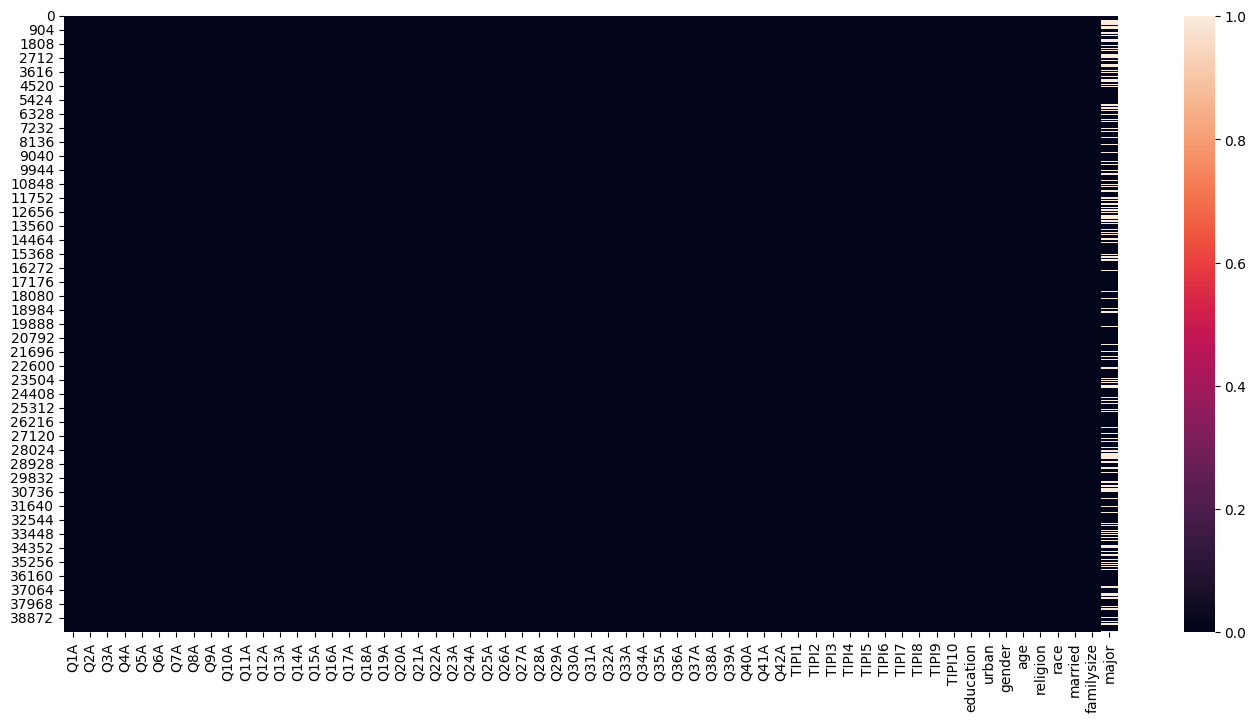

In [ ]:
plt.figure(figsize=(17, 8))
sns.heatmap(depression.isnull())

In [ ]:
depression.isnull().sum()

Q1A               0
Q2A               0
Q3A               0
Q4A               0
Q5A               0
              ...  
religion          0
race              0
married           0
familysize        0
major         11403
Length: 61, dtype: int64

<h2 style="color: #0675e8; font-weight: bold;">Analysis Step </h2>
**Make a copy of edpression dataset to work on it**

#### 1. Education Feature
**Which Education these people took?**

<Axes: xlabel='education', ylabel='count'>

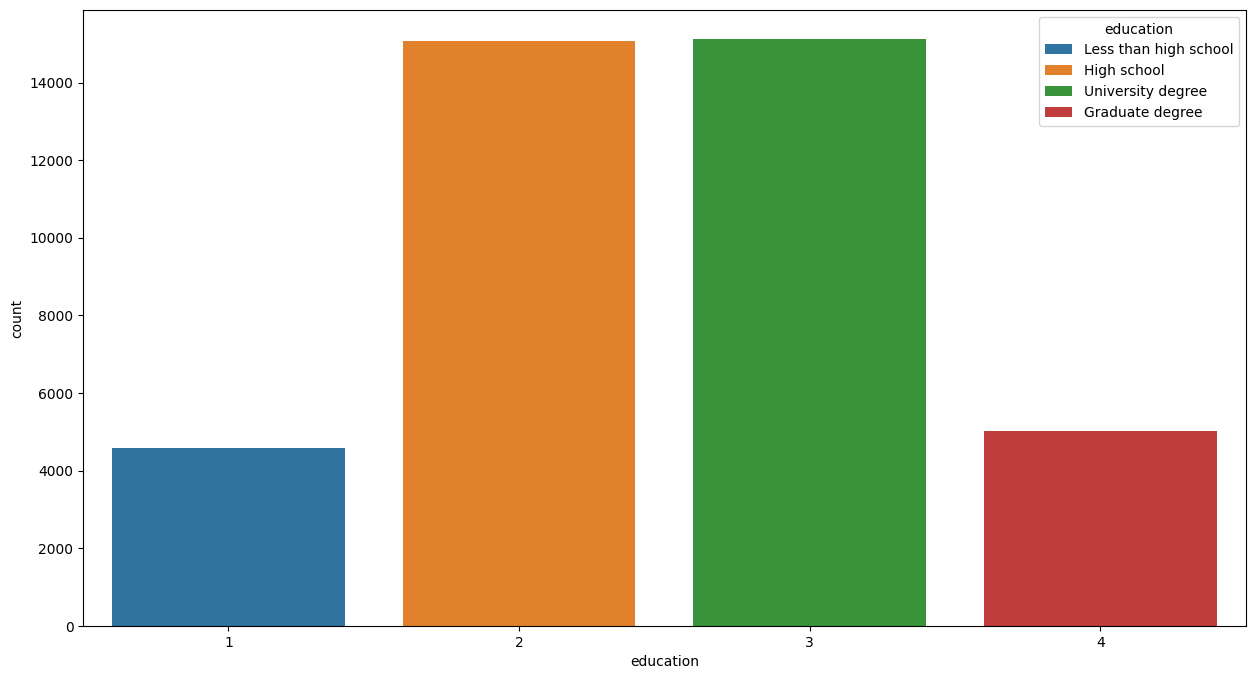

In [ ]:
'''
    education "How much education have you completed?"
    1=Less than high school,
    2=High school,
    3=University degree,
    4=Graduate degree
'''

# combine 0 and 1 values as one value of 1

depression['education'] = depression['education'].map({ 0: 1,  1: 1, 2: 2, 3: 3, 4: 4 })

def changeEducationTitle(title) -> str:
    if title == 0 or title == 1:
        return 'Less than high school'
    if title == 2:
        return 'High school'
    if title == 3:
        return 'University degree'
    if title == 4:
        return 'Graduate degree'
    return title


# change education values form numbers to values to understand
education_string = depression['education'].apply(changeEducationTitle)


plt.figure(figsize=(15, 8))
sns.countplot(x=depression['education'], hue=education_string)

* As we see the most people who participated in the survey are heigh school and university studentsd

#### 2. Major Feature
**What is the Major of people who filled the survey?**


In [ ]:
# change the major values that are related

def changeMajorValues(title):
    if 'busin' in str(title).lower() or 'manage' in str(title).lower() or 'Buss' in str(title) or 'Bisness' in str(title) or 'Manag' in str(title) or 'buis' in str(title) or 'Entrepreneur' in str(title) or 'entrepr' in str(title).lower() or 'managment' in str(title).lower() or 'Buis' in str(title) or 'Busni' in str(title) or 'Mana' in str(title) or 'buss' in str(title).lower() or 'Bi' in str(title) or 'Mgt' in str(title) or 'MBA' in str(title) or 'Mgmt' in str(title) or 'MD' in str(title):
        return 'Business/Management'
    elif 'information technology' in str(title).lower() or 'IT' in str(title) or 'it' in str(title):
        return 'I.T'
    elif 'math' in str(title).lower() or 'LOGISTICS' in str(title) or 'st' in str(title).lower() or 'marh' in str(title).lower() or 'Mate' in str(title):
        return 'Mathematics'
    elif 'computer' in str(title).lower():
        return 'I.T'
    elif 'bio' in str(title).lower() or 'Plant' in str(title) or 'plant' in str(title).lower() or 'Micro' in str(title):
        return 'Biology'
    elif 'tesl' in str(title).lower() or 'TES' in str(title) or 'Teso' in str(title) or 'Enhlish' in str(title):
        return 'English'
    elif 'account' in str(title).lower() or 'Accoun' in str(title) or 'Acc' in str(title) or 'acc' in str(title).lower() or 'Acouunt' in str(title) or 'Acvount' in str(title) or 'Count' in str(title):
        return 'Accountacy'
    elif 'CA' in str(title):
        return 'CA'
    elif 'none' in str(title).lower() or '0' in str(title) or  '_' in str(title) or '.' in str(title) or 'Nine' in str(title) or '19' in str(title):
        return 'No Degree'
    elif 'nurs' in str(title).lower() or 'BSN' in str(title):
        return 'Nursing'
    elif '-' in str(title).lower() or 'NIL' in str(title):
        return 'No Degree'
    elif 'teach' in str(title).lower() or 'Lect' in str(title) or 'eet' in str(title).lower():
        return 'Teaching'
    elif 'pharma' in str(title).lower() or 'medic' in str(title).lower() or 'med' in str(title).lower() or 'hospi' in str(title).lower() or 'Mwdicine' in str(title) or 'Farmacy' in str(title) or 'Pharacology' in str(title) or 'farmasi' in str(title).lower() or 'Farmasy' in str(title):
        return 'Pharmacy/Medical'
    elif 'doctor' in str(title).lower() or  'MBBS' in str(title) or 'Mbbs' in str(title) or 'Surge' in str(title) or 'surge' in str(title) or 'mbbs' in str(title).lower()or 'dermat' in str(title).lower() or 'Podiat' in str(title) :
        return 'Doctor'
    elif 'no' in str(title).lower() or 'Undec' in str(title) or 'Idk' in str(title) or 'idk' in str(title).lower() or 'Hahaha' in str(title) or 'never' in str(title).lower() or 'T' in str(title) or 'Good' in str(title):
        return 'No Degree'
    elif 'film' in str(title).lower() or 'Cinema' in str(title) or 'fil' in str(title).lower() or 'Adver' in str(title) or 'adver' in str(title) or 'Act' in str(title) or 'Enter' in str(title) or 'digital' in str(title).lower() or 'cinema' in str(title).lower() or 'Video' in str(title) or 'Direct' in str(title) or 'Theat' in str(title) or 'Radio' in str(title) or 'theat' in str(title).lower() or 'drama' in str(title).lower():
        return 'Media'
    elif 'international' in str(title).lower() or 'Internatianal' in str(title):
        return 'International Relations'
    elif 'human' in str(title).lower() or 'hr' in str(title).lower() or 'Hs' in str(title) or 'Hm' in str(title) or 'Humam' in str(title):
        return 'Human Resources'
    elif 'art' in str(title).lower() or 'Painting' in str(title) or 'Drawing' in str(title) or 'ba' in str(title) or 'Printing' in str(title) or 'las' in str(title).lower() or 'Ma' in str(title) or 'paint' in str(title).lower() or 'creative' in str(title).lower() or 'AA' in str(title) or 'BA' in str(title):
        return 'Arts'
    elif 'islam' in str(title).lower() or 'Muamalat' in str(title) or 'Quran' in str(title) or 'Halal' in str(title) or 'Usul' in str(title) or 'Zakat' in str(title) or 'usul' in str(title).lower():
        return 'Islamic Studies'
    elif 'physio' in str(title).lower() or 'fis' in str(title).lower():
        return 'Physiotherapy'
    elif 'socio' in str(title).lower() or 'social' in str(title).lower() or 'soical' in str(title).lower() or 'Sis' in str(title) or 'Sosio' in str(title) or 'Sicio' in str(title) or 'sosiality' in str(title).lower():
        return 'Sociology'
    elif 'bank' in str(title).lower():
        return 'Banking'
    elif 'agri' in str(title).lower():
        return 'Agriculture'
    elif 'Market' in str(title) or 'Finan' in str(title) or 'finance' in str(title).lower() or 'MARKETING' in str(title) or 'market' in str(title).lower() or 'retail' in str(title).lower() or 'CMP' in str(title) or 'Merket' in str(title):
        return 'Marketing/Finance'
    elif 'counsel' in str(title).lower() or 'cauns' in str(title) or 'Kaunseling' in str(title) or 'kaunseling' in str(title) or 'Caunsel' in str(title):
        return 'Counselling'
    elif 'programming' in str(title).lower() or 'coding' in str(title).lower() or 'Ibm' in str(title) or 'ceit' in str(title) or 'Hacking' in str(title):
        return 'I.T'
    elif 'civil' in str(title).lower() or 'comp' in str(title).lower() or 'Mechanical' in str(title) or 'Electrical' in str(title) or 'Mechatronics' in str(title) or 'Eee' in str(title) or 'cs' in str(title).lower() or 'mecha' in str(title) or 'Chemical' in str(title) or 'chemical' in str(title) or 'tech' in str(title) or 'ec' in str(title).lower() or 'egineering' in str(title).lower() or 'manufacturing' in str(title).lower():
        return 'Engineering'
    elif 'ict' in str(title).lower() or 'developer' in str(title).lower() or 'I.T' in str(title) or 'CAE&D' in str(title) or 'It' in str(title):
        return 'I.T'
    elif 'commu' in str(title).lower() or 'comm' in str(title).lower() or 'com' in str(title).lower() or 'Conmunication' in str(title):
        return 'Communications'
    elif 'administration' in str(title).lower() or 'admin' in str(title).lower():
        return 'Administration'
    elif 'psycho' in str(title).lower() or 'psy' in str(title).lower() or 'Clinical osychology' in str(title) or 'hschology' in str(title) or 'Pysch' in str(title) or 'pys' in str(title).lower() or 'Pych' in str(title) or 'pscy' in str(title) or 'payc' in str(title).lower() or 'Phyc' in str(title) or 'psicologia' in str(title) or 'Phsychology' in str(title) or 'Phichology' in str(title) or 'psuchology' in str(title) or 'Pschology' in str(title) or 'psikologi' in str(title).lower():
        return 'Psychology'
    elif 'english' in str(title).lower() or 'Elglish' in str(title) or 'esl' in str(title).lower() or 'Emg' in str(title) or 'emglisj' in str(title).lower():
        return 'English'
    elif 'law' in str(title).lower() or 'BBA' in str(title) or 'llb' in str(title) or 'lew' in str(title).lower() or 'kaw' in str(title).lower() or 'enforcement' in str(title).lower() or 'Kaw' in str(title):
        return 'Law'
    elif 'engineering' in str(title).lower() or 'engi' in str(title).lower() or 'eng' in str(title).lower() or 'Software' in str(title) or 'soft' in str(title).lower() or 'mechanical' in str(title).lower() or 'Egineeering' in  str(title) or 'electronic' in str(title).lower() or 'CE' in str(title) or 'mech' in str(title).lower() or 'Ciclvil' in str(title) or 'Eggineering' in str(title) or 'Tech' in str(title) or 'Teol' in str(title) or 'EEE' in str(title) or 'PE' in str(title):
        return 'Engineering'
    elif 'architecture' in str(title).lower() or 'aechitecture' in str(title).lower() or 'archirecture' in str(title).lower() or 'architect' in str(title).lower() or 'Arsitechture' in str(title) or 'Building' in str(title) or 'building' in str(title).lower() or 'Arc' in str(title):
        return 'Architecture'
    elif 'design' in str(title).lower() or 'Desig' in str(title) or 'Dssign' in str(title):
        return 'Designer'
    elif 'science' in str(title).lower() or 'Sceince' in str(title) or 'Sci' in str(title) or 'sciene' in str(title) or 'BS' in str(title):
        return 'Pure Sciences'
    elif 'physics' in str(title).lower() or 'Phsyics' in str(title) or 'EMC' in str(title) or 'Physic' in str(title) or 'physi' in str(title):
        return 'Physics'
    elif 'chemistry' in str(title).lower() or 'CIS' in str(title) or 'Chem' in str(title):
        return 'Chemistry'
    elif 'french' in str(title).lower() or 'Fr' in str(title):
        return 'French'
    elif 'religi' in str(title).lower() or 'Relegion' in str(title) or 'Rel' in str(title) or 'Hukum' in str(title) or 'Sains' in str(title):
        return 'Religious Studies'
    elif title=='&#1593;&#1604;&#1605; &#1606;&#1601;&#1587;' or title=='&#22810;&#23186;&#39636;&#35373;&#35336;' or title=='nil' or title=='drop out' or title=='&#1055;&#1089;&#1080;&#1093;&#1086;&#1083;&#1' or title=='75' or title=='Secondary education' or title=='Thiê&#769;t kê&#769; &#273;ô&#768; ho&#803;a' or title=='18' or title=='ongoing' or title=='&#28888;&#22521;' or title=='lol' or title=='In college currently' or title=='secondary education' or title=='Dropped out' or title=='na' or title=='didnt attend' or title=='im going on the next year. ' or title=='&#304;lahiyat' or title=='lmfao, im 15' or title=='Elem Ed' or title=='yes' or title=='N/a' or title=='/' or title=='???' or title=='cocaine 101' or title=='doesnt matter' or title== 'oooo' or title=='G' or title=='Yes' or title=='Na' or title=='Na 'or title=='Want sure':
        return 'No Degree'
    elif 'Music' in str(title) or 'Dance' in str(title) or 'danc' in str(title).lower() or 'Vocational' in str(title) or 'Muisc' in str(title) or 'music' in str(title).lower() or 'Performance' in str(title):
        return 'Music/Dance'
    elif 'pol' in str(title).lower() or 'Govern' in str(title) or 'Right' in str(title):
        return 'Politics'
    elif 'photo' in str(title).lower() or 'Foto' in str(title) or 'Photo' in str(title):
        return 'Photography'
    elif 'Television' in str(title) or 'telev' in str(title).lower():
        return 'Television'
    elif 'bahasa' in str(title).lower() or 'Bahasa' in str(title) or 'Malay' in str(title) or 'malay' in str(title).lower():
        return 'Malaysian languages'
    elif 'Urban' in str(title) or 'Town' in str(title) or 'town' in str(title).lower() or 'planning' in str(title) or 'Plann' in str(title) or 'development' in str(title):
        return 'Economic Developments'
    elif 'Public' in str(title) or 'public' in str(title).lower():
        return 'Public Relations'
    elif 'Writing' in str(title) or 'writing' in str(title).lower() or 'Screenwritinf' in str(title) or 'Author' in str(title):
        return 'Writing/Author'
    elif 'philosophy' in str(title).lower() or 'Phil' in str(title) or 'philos' in str(title).lower() or 'Filo' in str(title) or 'Phylosophy' in str(title):
        return 'Philosophy'
    elif 'Actua' in str(title):
        return 'Acturial Studies'
    elif 'DENTALWORKS' in str(title) or 'dental' in str(title) or 'Dental' in str(title) or 'Odont' in str(title):
        return 'Dentist'
    elif 'beaut' in str(title).lower() or 'Fashion' in str(title) or 'make' in str(title) or 'fashion' in str(title).lower() or 'hair' in str(title).lower() or 'cosmet' in str(title).lower():
        return 'Fashion'
    elif 'Health' in str(title) or 'health' in str(title).lower() or 'wellness' in str(title).lower() or 'Healtcare' in str(title):
        return 'Healthcare'
    elif 'Language' in str(title) or 'lang' in str(title).lower() or 'Laq' in str(title):
        return 'Languages'
    elif 'cook' in str(title).lower() or 'bakery' in str(title).lower() or 'Bak' in str(title) or 'CULINARY' in str(title) or 'Food' in str(title) or 'food' in str(title) or 'chef' in str(title).lower() or 'Cul' in str(title) or 'Patiss' in str(title) or 'culi' in str(title).lower():
        return 'Cookings'
    elif 'Hotel' in str(title) or 'hotel' in str(title).lower() or 'food service' in str(title) or 'cater' in str(title).lower():
        return 'Hotel Management'
    elif 'therapy' in str(title).lower() or 'ot' in str(title).lower() or 'theraphy' in str(title):
        return 'Therapeutical Studies'
    elif 'veter' in str(title).lower() or 'Veter' in str(title) or 'Vet' in str(title):
        return 'Veterinary'
    elif 'Survey' in str(title) or 'survey' in str(title) or 'serveyors' in str(title).lower() or 'Qs' in str(title) or 'SURVEYING' in str(title) or 'QS' in str(title) or 'Surver' in str(title):
        return 'Surveyour Studies'
    elif 'Aircraft' in str(title) or 'aircraft' in str(title).lower() or 'aircr' in str(title).lower() or 'aviation' in str(title).lower() or 'Aero' in str(title) or 'navigation' in str(title).lower():
        return 'Aircrafts'
    elif 'environment' in str(title).lower() or 'Environment' in str(title) or 'envi' in str(title).lower():
        return 'Environmental Educations'
    elif 'Syariah' in str(title) or 'syariah' in str(title):
        return 'Syrian Languages'
    elif 'judicial' in str(title).lower() or 'juri' in str(title).lower() or 'legal' in str(title).lower():
        return 'Judicial Studies'
    elif 'Liter' in str(title) or 'literature' in str(title) or 'litt' in str(title).lower():
        return 'Literature'
    elif 'child' in str(title).lower() or 'Child' in str(title) or 'Preschool' in str(title):
        return 'Child Educations'
    elif 'Tour' in str(title) or 'tour'  in str(title).lower():
        return 'Tourisms'
    elif 'Gam' in str(title) or 'game' in str(title).lower():
        return 'Gaming'
    elif 'education' in str(title).lower() or 'Education' in str(title) or 'ed' in str(title).lower() or 'acad' in str(title) or 'Dploma' in str(title):
        return 'B.Ed or M.Ed'
    elif 'Sport' in str(title) or 'sport' in str(title).lower():
        return 'Sports'
    elif 'Petro' in str(title):
        return 'Petroleum'
    elif 'Journ' in str(title) or 'jour' in str(title).lower() or 'Joun' in str(title) or 'Jurn' in str(title):
        return 'Journalism'
    elif 'Mandarin' in str(title):
        return 'Chinese/Mandarin Languages'
    elif 'Electrician' in str(title):
        return 'Electrician'
    elif 'Network' in str(title) or 'network' in str(title).lower():
        return 'Networking'
    elif 'geo' in str(title).lower() or 'GEO' in str(title):
        return 'Geography'
    elif 'Librarian' in str(title) or 'lib' in str(title).lower():
        return 'Librarian'
    elif 'Mission' in str(title) or 'mission' in str(title).lower():
        return 'Missionary Studies'
    elif 'Forensic' in str(title) or 'foren' in str(title).lower() or 'Crime' in str(title) or 'crim' in str(title).lower():
        return 'Forensic/Criminal studies'
    elif 'Animation' in str(title) or 'animation' in str(title).lower() or 'imag' in str(title) or 'graphic' in str(title) or 'Graphic' in str(title):
        return 'Animations'
    elif 'aqua' in str(title).lower() or 'Aqu' in str(title):
        return 'Aquaculture'
    elif 'soldier' in str(title).lower() or 'lwa' in str(title).lower() or 'defence' in str(title):
        return 'Army'
    elif 'Kinesi' in str(title) or 'kines' in str(title).lower() or 'hod' in str(title):
        return 'Human Kinetics'
    elif 'Horti' in str(title) or 'horti' in str(title) or 'Landscape' in str(title):
        return 'Horticulture'
    elif 'commerce' in str(title).lower() or 'Coome' in str(title):
        return 'Commerce'
    elif 'Speech' in str(title) or 'speech' in str(title).lower():
        return 'Speech Pathology'
    elif 'SECRET' in str(title) or 'secret' in str(title).lower():
        return 'Secretary'
    elif 'Animals' in str(title) or 'animal' in str(title).lower() or 'Pet' in str(title):
        return 'Animal Care'
    elif 'Organisation' in str(title) or 'organi' in str(title).lower():
        return 'Organizational Behaviour'
    elif 'event' in str(title).lower() or 'Event' in str(title):
        return 'Event Managment'
    elif 'radiology' in str(title).lower() or 'Radiography' in str(title) or 'radiograpghy' in str(title).lower() or 'Radiation' in str(title) or 'radiography' in str(title):
        return 'Radiography'
    elif 'nutrition' in str(title).lower() or 'Nutrition' in str(title):
        return 'Nutritionist'
    elif 'Audit' in str(title) or 'audit' in str(title).lower():
        return 'Auditing'
    elif 'Neuro' in str(title) or 'neuroligy' in str(title).lower():
        return 'Neurology'
    elif 'Anato' in str(title) or 'anat' in str(title).lower():
        return 'Anatomy'
    elif 'trade' in str(title).lower():
        return 'Trading'
    elif 'Interpre' in str(title) or 'translation' in str(title).lower():
        return 'Interpreter'
    elif 'audio' in str(title).lower() or 'Audio' in str(title):
        return 'Audiology'
    elif 'insurance' in str(title).lower() or 'Insurance' in str(title):
        return 'Insurances'
    elif 'archaeology' in str(title).lower() or 'archaeology' in str(title).lower() or 'archeology' in str(title).lower() or 'treasury' in str(title):
        return 'Archeology'
    elif 'SERV'in str(title) or 'service' in str(title).lower():
        return 'Service Training'
    elif 'GERMAN' in str(title) or 'german' in str(title).lower():
        return 'German'
    elif 'KOREAN' in str(title) or 'Korea' in str(title):
        return 'Korean'
    elif 'valuat' in str(title).lower() or 'valuer' in str(title).lower():
        return 'Registered Valuer'
    elif 'skil' in str(title).lower() or 'Skill' in str(title) or 'Professional' in str(title) or 'practical' in str(title).lower():
        return 'Skilled Labour'
    elif 'virology' in str(title):
        return 'Virology'
    elif 'lab' in str(title).lower() or 'Lab' in str(title) or 'MLT' in str(title):
        return 'Laboratory Worker'
    elif 'GENERAL' in str(title) or 'General' in str(title):
        return 'General'
    elif 'Opto' in str(title) or 'opto' in str(title).lower():
        return 'Optometry'
    elif 'Zoo' in str(title) or 'zoo' in str(title).lower():
        return 'Zoology'
    elif 'office' in str(title).lower() or 'Office' in str(title):
        return 'Office Skills'
    elif 'found' in str(title).lower() or 'Found' in str(title):
        return 'Foundation Education'
    elif 'general' in str(title).lower() or 'General' in str(title):
        return 'General Education'
    elif 'real estate' in str(title).lower() or 'property' in str(title).lower():
        return 'Realtor'
    elif 'Meteorology' in str(title) or 'Metrology' in str(title):
        return 'Meterology'
    elif 'operations' in str(title).lower() or 'Operation' in str(title):
        return 'Operational Managment'
    elif 'Merchandising' in str(title) or 'merchand' in str(title).lower():
        return 'Merchandising'
    elif 'Spanish' in str(title):
        return 'Spanish'
    elif 'Nature' in str(title) or 'natur' in str(title).lower():
        return 'Nature Conservation/Resources'
    elif title=='a level ' or title==' ':
        return 'No Degree'
    elif 'Corporate' in str(title) or 'corporate' in str(title).lower():
        return 'Corporate'
    elif 'greek' in str(title).lower() or 'Greek' in str(title):
        return 'Greek'
    elif 'Behaviour' in str(title) or 'Behavior' in str(title) or 'Organizational Behaviour' in str(title):
        return 'Behaviour Analysis'
    elif 'publish' in str(title).lower():
        return 'Publishing'
    elif 'Safety' in str(title) or 'safety' in str(title).lower():
        return 'Safety Training'
    elif 'genetic' in str(title).lower() or 'Genetic' in str(title):
        return 'Genetics'
    elif 'Dietetic' in str(title):
        return 'Dietician'
    elif 'Production' in str(title) or 'manufacturing' in str(title).lower():
        return 'Production And Manufacturing'
    elif 'Welding' in str(title):
        return 'Welding'
    elif 'Geron' in str(title):
        return 'Gerontology'
    elif 'Research' in str(title) or 'Ph D' in str(title):
        return 'Ph.D'
    elif 'arabic' in str(title).lower() or 'Arabic' in str(title):
        return 'Arabic'
    else:
        return title

# if major has np.nan then fill with 'No Degree' value
depression['major'].fillna('No Degree', inplace=True)
depression['major'] = depression['major'].apply(changeMajorValues)

depression['major'].value_counts()

No Degree              12708
Engineering             3904
Business/Management     3220
I.T                     2572
Mathematics             2362
                       ...  
Mining                     1
usa                        1
Ophthmalology              1
Cabin Crew                 1
Virology                   1
Name: major, Length: 158, dtype: int64

<Axes: >

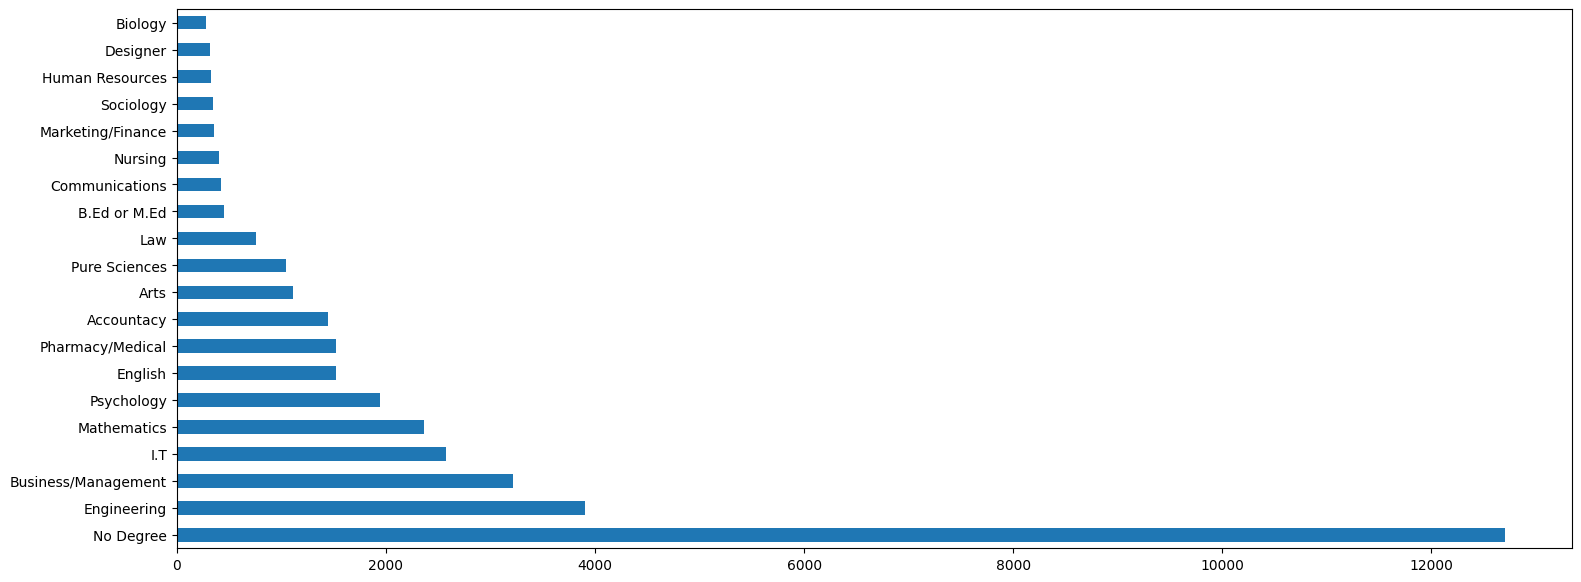

In [ ]:
plt.figure(figsize=(18, 7))
depression['major'].value_counts()[:20].plot(kind = 'barh')
# sns.countplot(x=depression['major'], orient='v')

* As we see most of the people how participated in the survey has no degree

<div style=" ">
    <strong style="color: red; margin-left: 10px; display: inline-block">But: </strong>
    <span>Major has no effect for being person depressed or not, so it's better to remove it</span>

</div>

In [ ]:
depression.drop('major', inplace=True, axis=1)
depression.head()

,Q1A,Q2A,Q3A,Q4A,Q5A,Q6A,Q7A,Q8A,Q9A,Q10A,Q11A,Q12A,Q13A,Q14A,Q15A,Q16A,Q17A,Q18A,Q19A,Q20A,Q21A,Q22A,Q23A,Q24A,Q25A,Q26A,Q27A,Q28A,Q29A,Q30A,Q31A,Q32A,Q33A,Q34A,Q35A,Q36A,Q37A,Q38A,Q39A,Q40A,Q41A,Q42A,TIPI1,TIPI2,TIPI3,TIPI4,TIPI5,TIPI6,TIPI7,TIPI8,TIPI9,TIPI10,education,urban,gender,age,religion,race,married,familysize
0,4,4,2,4,4,4,4,4,2,1,4,4,4,4,4,4,3,4,3,3,1,4,4,4,4,4,4,3,4,2,4,4,2,3,4,4,1,2,4,3,4,4,1,5,7,7,7,7,7,5,1,1,2,3,2,16,12,10,1,2
1,4,1,2,3,4,4,3,4,3,2,2,2,4,4,3,3,4,2,1,1,2,3,1,2,2,3,3,4,3,3,2,3,3,2,2,3,4,2,2,1,2,2,6,5,4,7,5,4,7,7,1,5,2,3,2,16,7,70,1,4
2,3,1,4,1,4,3,1,3,2,4,2,1,4,1,4,4,4,2,2,1,4,3,2,4,2,1,2,1,2,2,4,3,1,4,3,4,4,4,2,2,1,4,2,5,2,2,5,6,5,5,3,2,2,3,2,17,4,60,1,3
3,2,3,2,1,3,3,4,2,3,3,2,1,1,4,2,2,3,1,1,2,1,1,1,1,1,2,4,1,3,3,3,1,2,4,1,1,2,1,3,4,4,2,1,1,7,4,6,4,6,1,6,1,1,3,2,13,4,70,1,5
4,2,2,3,4,4,2,4,4,4,3,2,4,4,4,4,3,4,4,4,4,3,3,4,2,4,4,2,4,2,4,3,4,4,4,3,4,3,3,3,4,4,3,2,5,3,6,5,5,5,6,3,3,3,2,2,19,10,10,1,4


#### 3. Urban
**What is urban the person live?**

<Axes: xlabel='urban', ylabel='count'>

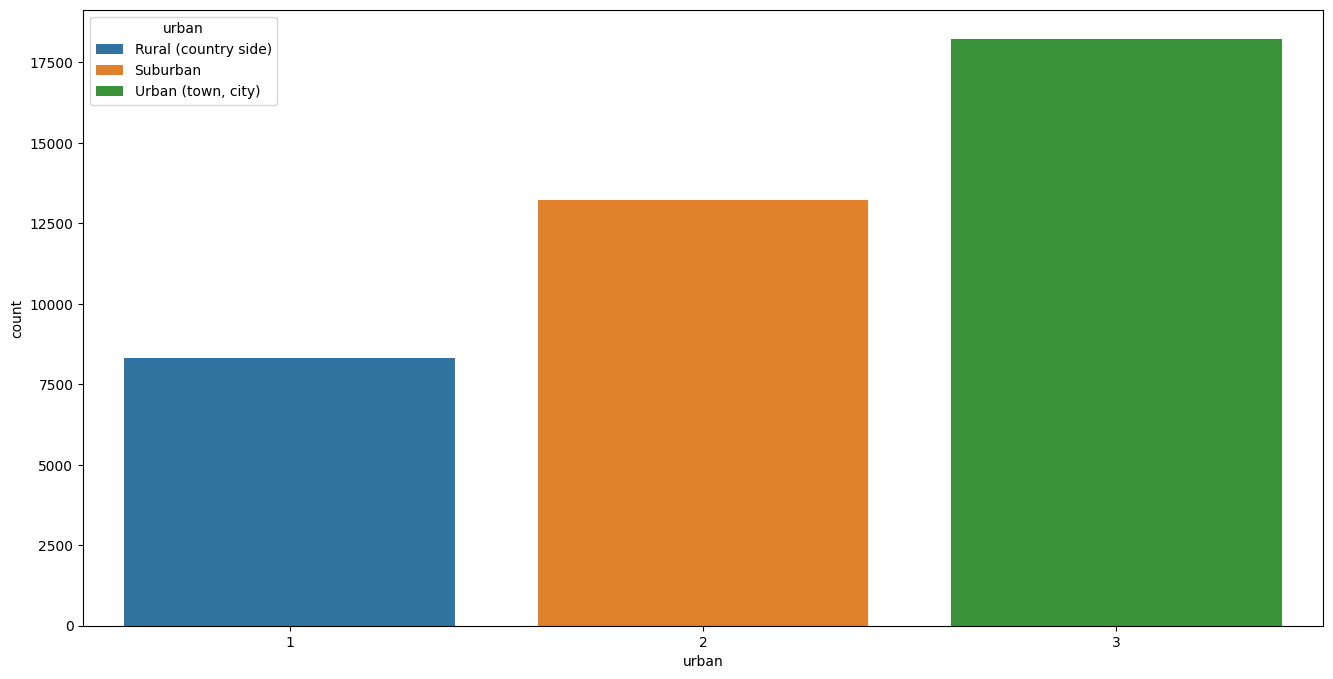

In [ ]:
'''
Urban Feature Values:
    1=Rural (country side),
    2=Suburban,
    3=Urban (town, city)
    0=None
'''

# change 0 to 3 value as it's the most used one
depression['urban'] = depression['urban'].map({0: 3, 1: 1, 2: 2, 3: 3})

def changeUrbanValues(value):
    if value == 1:
        return 'Rural (country side)'
    if value == 2:
        return 'Suburban'
    if value == 3:  # if value is 0 means user don't entered this value and we assume he is urban as most records are
        return 'Urban (town, city)'
    return value

urban = depression['urban'].apply(changeUrbanValues)

plt.figure(figsize=(16, 8))
sns.countplot(x=depression['urban'], hue= urban)

* As we see Urban People are the most people who participated in the survey

#### 4. Gender Feature
**Does Male or Female is more survey participatoin?**


<Axes: xlabel='gender', ylabel='count'>

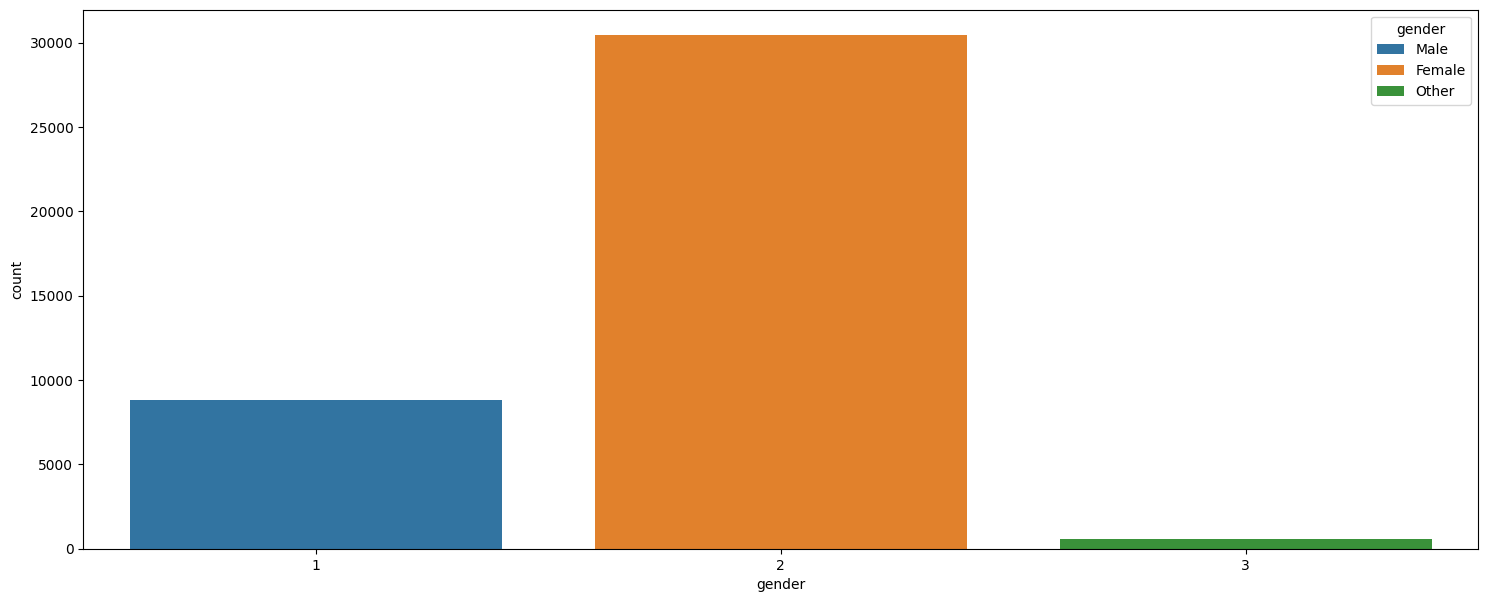

In [ ]:
'''
Gender Feature Values
    0=None
    1=Male,
    2=Female,
    3=Other
'''

# change value 0 to 2 as female are most recorded in depressionset
depression['gender'] = depression['gender'].map({0: 2, 1: 1, 2: 2, 3: 3})

def changeGenderValue(value):
    if value == 1:
        return 'Male'
    if value == 2 or value == 0: # value = 0 means user didn't enter this value, we assume it's female as most records are
        return 'Female'
    return 'Other' # if 3 or 0 return other as value

gender = depression['gender'].apply(changeGenderValue)

plt.figure(figsize=(18, 7))
sns.countplot(x = depression['gender'], hue=gender)


* Female are the most people who participated in the survey

#### 5. Religin Feature

convert religin values from numbers to strings and do some viz

10    22073
2      3845
1      3245
4      3097
7      2254
12     2160
6      1544
8       700
3       527
9       144
5       122
11       64
Name: religion, dtype: int64

<Axes: xlabel='religion', ylabel='count'>

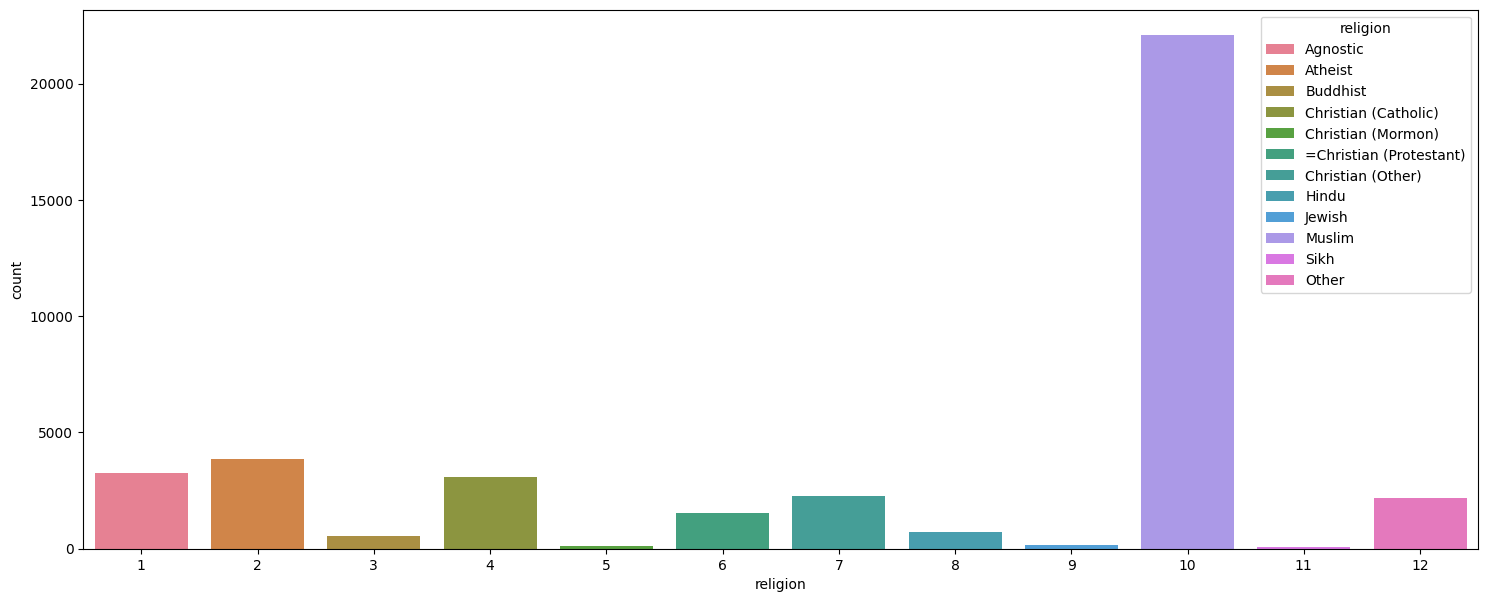

In [ ]:
# change 0 value to 12 as it's ohter value for people who didn't enter value to this field
def updateEducationValue(value):
    if value == 0:
        return 12
    return value

depression['religion'] = depression['religion'].apply(updateEducationValue)

def changeReliginValues(value) -> str:
    if value == 0:
        return 'Other'
    if value == 1:
        return 'Agnostic'
    if value == 2:
        return 'Atheist'
    if value == 3:
        return 'Buddhist'
    if value == 4:
        return 'Christian (Catholic)'
    if value == 5:
        return 'Christian (Mormon)'
    if value == 6:
        return '=Christian (Protestant)'
    if value == 7:
        return 'Christian (Other)'
    if value == 8:
        return 'Hindu'
    if value == 9:
        return 'Jewish'
    if value == 10:
        return 'Muslim'
    if value == 11:
        return 'Sikh'
    if value == 12:
        return 'Other'
    return value

religin = depression['religion'].apply(changeReliginValues)

# show value counts of religin depression
display(depression['religion'].value_counts())

plt.figure(figsize=(18, 7))
sns.countplot(x=depression['religion'], hue= religin)


* As we see most who participated in the servey are Muslims

#### 6. Race Feature

Let's see the race of people who participated in the survey

Convert race feature values into strings for better understanding and do some viz

In [ ]:
# divide values by 10
depression['race'] = depression['race'].apply(lambda x: x/10)
depression['race'].head()

0    1.0
1    7.0
2    6.0
3    7.0
4    1.0
Name: race, dtype: float64

1.0    23076
6.0    10652
7.0     4830
3.0      603
2.0      331
5.0      220
4.0       21
Name: race, dtype: int64

<Axes: xlabel='race', ylabel='count'>

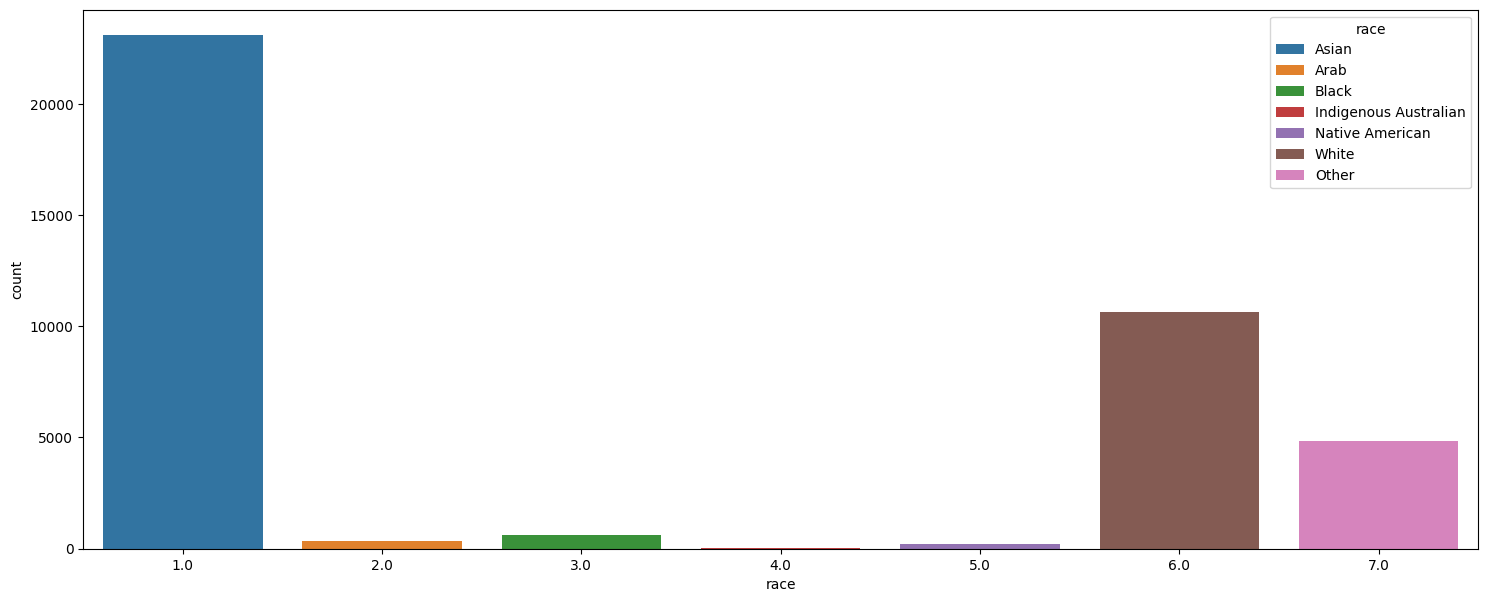

In [ ]:
def changeRaceValues(value)->str:
    if value == 1:
        return 'Asian'
    if value == 2:
        return 'Arab'
    if value == 3:
        return 'Black'
    if value == 4:
        return 'Indigenous Australian'
    if value == 5:
        return 'Native American'
    if value == 6:
        return 'White'
    if value == 7:
        return 'Other'

    return value

race = depression['race'].apply(changeRaceValues)

# show value counts of race
display(depression['race'].value_counts())

# show some Viz
plt.figure(figsize=(18, 7))
sns.countplot(x=depression['race'], hue=race)

In [ ]:
depression.head()

,Q1A,Q2A,Q3A,Q4A,Q5A,Q6A,Q7A,Q8A,Q9A,Q10A,Q11A,Q12A,Q13A,Q14A,Q15A,Q16A,Q17A,Q18A,Q19A,Q20A,Q21A,Q22A,Q23A,Q24A,Q25A,Q26A,Q27A,Q28A,Q29A,Q30A,Q31A,Q32A,Q33A,Q34A,Q35A,Q36A,Q37A,Q38A,Q39A,Q40A,Q41A,Q42A,TIPI1,TIPI2,TIPI3,TIPI4,TIPI5,TIPI6,TIPI7,TIPI8,TIPI9,TIPI10,education,urban,gender,age,religion,race,married,familysize
0,4,4,2,4,4,4,4,4,2,1,4,4,4,4,4,4,3,4,3,3,1,4,4,4,4,4,4,3,4,2,4,4,2,3,4,4,1,2,4,3,4,4,1,5,7,7,7,7,7,5,1,1,2,3,2,16,12,1.0,1,2
1,4,1,2,3,4,4,3,4,3,2,2,2,4,4,3,3,4,2,1,1,2,3,1,2,2,3,3,4,3,3,2,3,3,2,2,3,4,2,2,1,2,2,6,5,4,7,5,4,7,7,1,5,2,3,2,16,7,7.0,1,4
2,3,1,4,1,4,3,1,3,2,4,2,1,4,1,4,4,4,2,2,1,4,3,2,4,2,1,2,1,2,2,4,3,1,4,3,4,4,4,2,2,1,4,2,5,2,2,5,6,5,5,3,2,2,3,2,17,4,6.0,1,3
3,2,3,2,1,3,3,4,2,3,3,2,1,1,4,2,2,3,1,1,2,1,1,1,1,1,2,4,1,3,3,3,1,2,4,1,1,2,1,3,4,4,2,1,1,7,4,6,4,6,1,6,1,1,3,2,13,4,7.0,1,5
4,2,2,3,4,4,2,4,4,4,3,2,4,4,4,4,3,4,4,4,4,3,3,4,2,4,4,2,4,2,4,3,4,4,4,3,4,3,3,3,4,4,3,2,5,3,6,5,5,5,6,3,3,3,2,2,19,10,1.0,1,4


#### 7. TIPIx Features

The TIPI items were rated "I see myself as:" _____ such that

##### <span style="color: coral">7.1 TIPI-1 Feature <span>
I see myself as: <span style="color: green">Extraverted, enthusiastic.</span>

In [ ]:
depression['TIPI1'].value_counts()

5    8420
1    6229
6    6046
4    5877
2    5603
3    4633
7    2482
0     485
Name: TIPI1, dtype: int64

<Axes: xlabel='TIPI1', ylabel='count'>

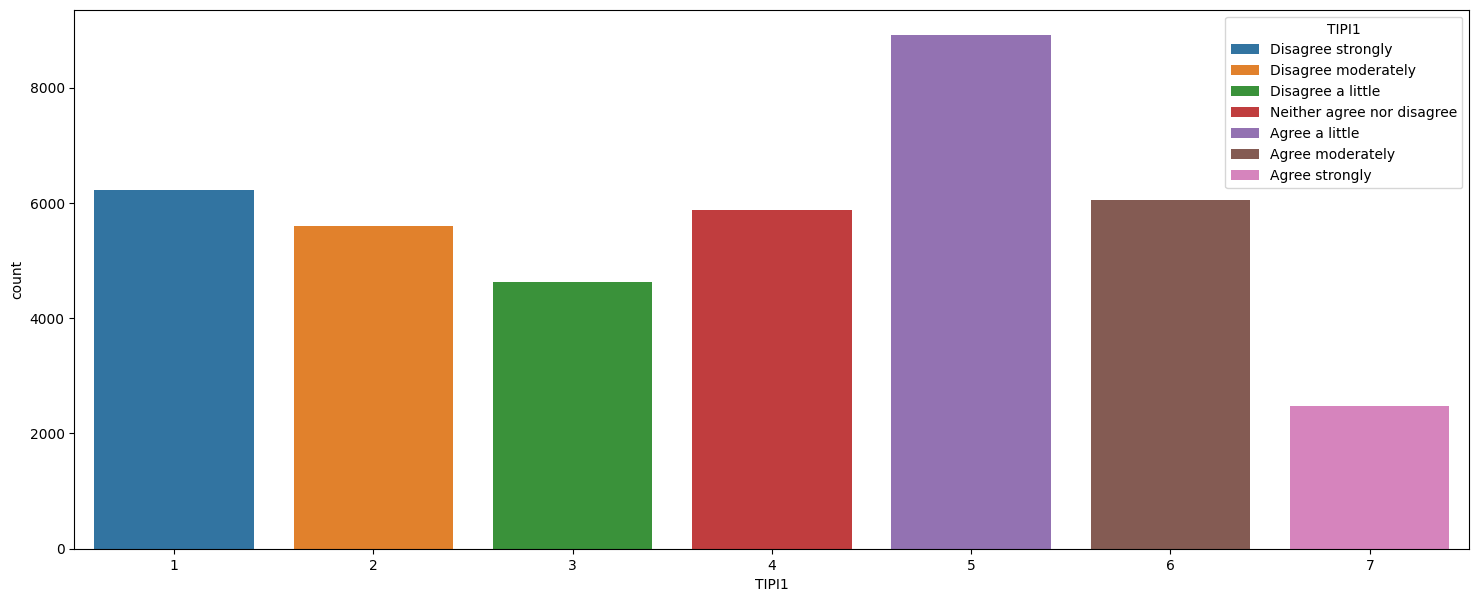

In [ ]:
# change 0 value to 5 as it's the most chosen value in the survey
def changeFromToinTIPI(value, From, to):
    if value == From:
        return to
    return value

depression['TIPI1'] = depression['TIPI1'].apply(lambda value: changeFromToinTIPI(value, 0, 5))

def changeTIPIValues(value):
    if value == 1:
        return 'Disagree strongly'
    if value == 2:
        return 'Disagree moderately'
    if value == 3:
        return 'Disagree a little'
    if value == 4:
        return 'Neither agree nor disagree'
    if value == 5:
        return 'Agree a little'
    if value == 6:
        return 'Agree moderately'
    if value == 7:
        return 'Agree strongly'

    return value

tipi = depression['TIPI1'].apply(changeTIPIValues)


plt.figure(figsize=(18, 7))
sns.countplot(x=depression['TIPI1'], hue=tipi)

most people who choosed TIPI1 question aggreed a little and disagreed

##### <span style="color: coral">7.2 TIPI-2 Feature <span>
I see myself as: <span style="color: green">Critical, quarrelsome.</span>

In [ ]:
depression['TIPI2'].value_counts()

5    10373
6     6990
4     6171
3     4326
2     4040
1     3985
7     3320
0      570
Name: TIPI2, dtype: int64

<Axes: xlabel='TIPI2', ylabel='count'>

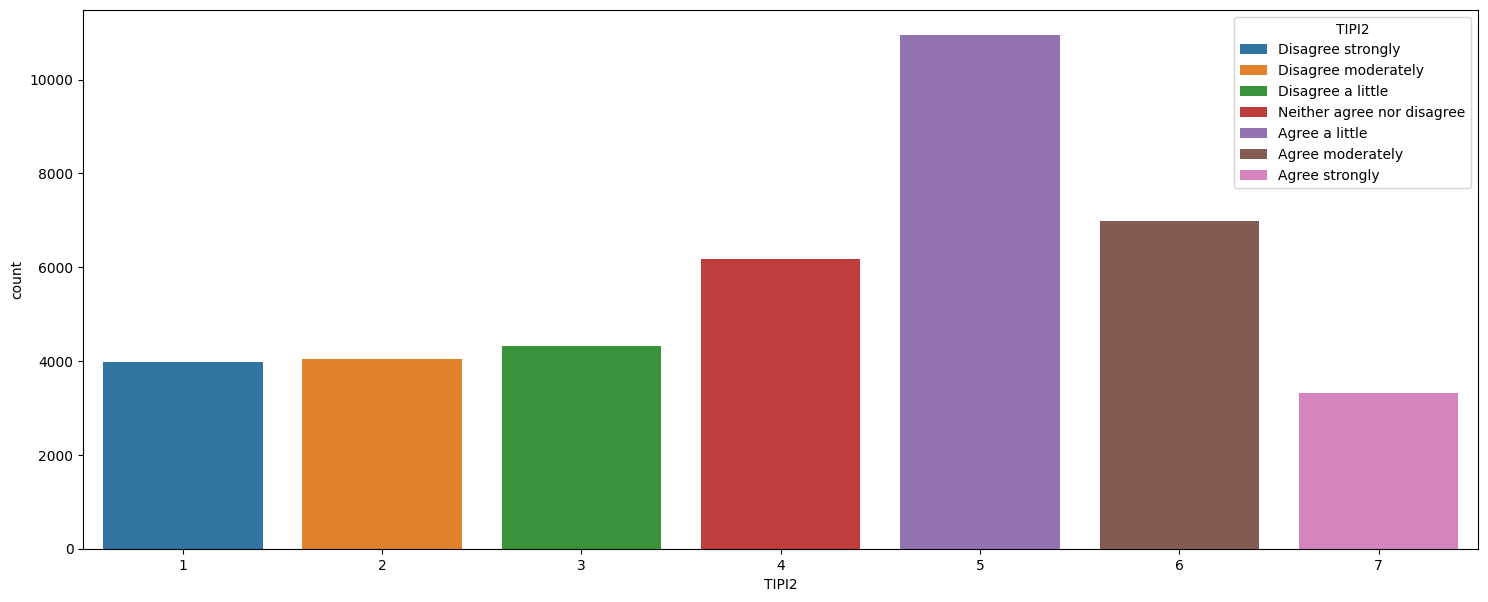

In [ ]:
# change 0 value to 5 as it's the most chosen value in the survey
depression['TIPI2'] = depression['TIPI2'].apply(lambda value: changeFromToinTIPI(value, 0, 5))

# convert numbers to string for better viz
tipi = depression['TIPI2'].apply(changeTIPIValues)

plt.figure(figsize=(18, 7))
sns.countplot(x=depression['TIPI2'], hue=tipi)

##### <span style="color: coral">7.3 TIPI-3 Feature <span>
I see myself as: <span style="color: green">Dependable, self-disciplined.</span>

In [ ]:
depression['TIPI3'].value_counts()

6    10230
5     9121
7     6242
4     4516
3     3981
2     2843
1     2252
0      590
Name: TIPI3, dtype: int64

<Axes: xlabel='TIPI3', ylabel='count'>

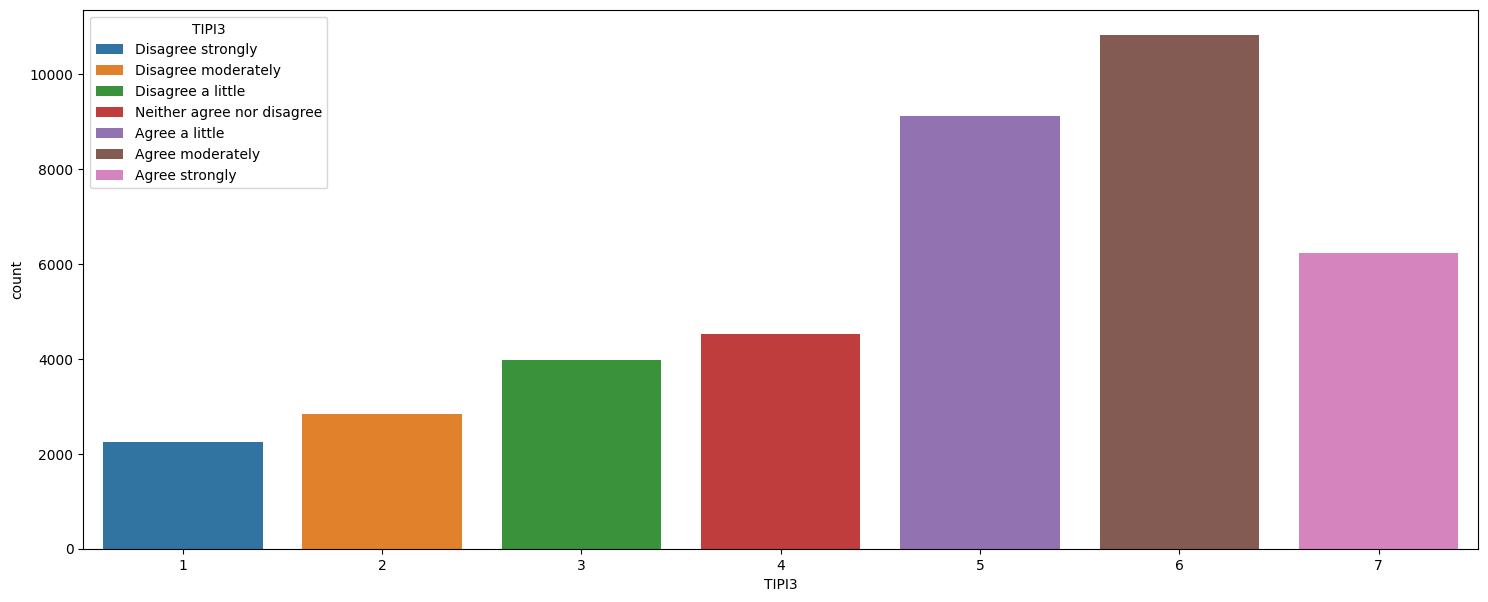

In [ ]:
# change 0 value to 5 as it's the most chosen value in the survey
depression['TIPI3'] = depression['TIPI3'].apply(lambda value: changeFromToinTIPI(value, 0, 6))

# convert numbers to string for better viz
tipi = depression['TIPI3'].apply(changeTIPIValues)

plt.figure(figsize=(18, 7))
sns.countplot(x=depression['TIPI3'], hue=tipi)

##### <span style="color: coral">7.4 TIPI-4 Feature <span>
I see myself as: <span style="color: green">Anxious, easily upset.</span>

In [ ]:
depression['TIPI4'].value_counts()

7    11360
6     9561
5     8751
4     2720
2     2444
3     2434
1     2042
0      463
Name: TIPI4, dtype: int64

<Axes: xlabel='TIPI4', ylabel='count'>

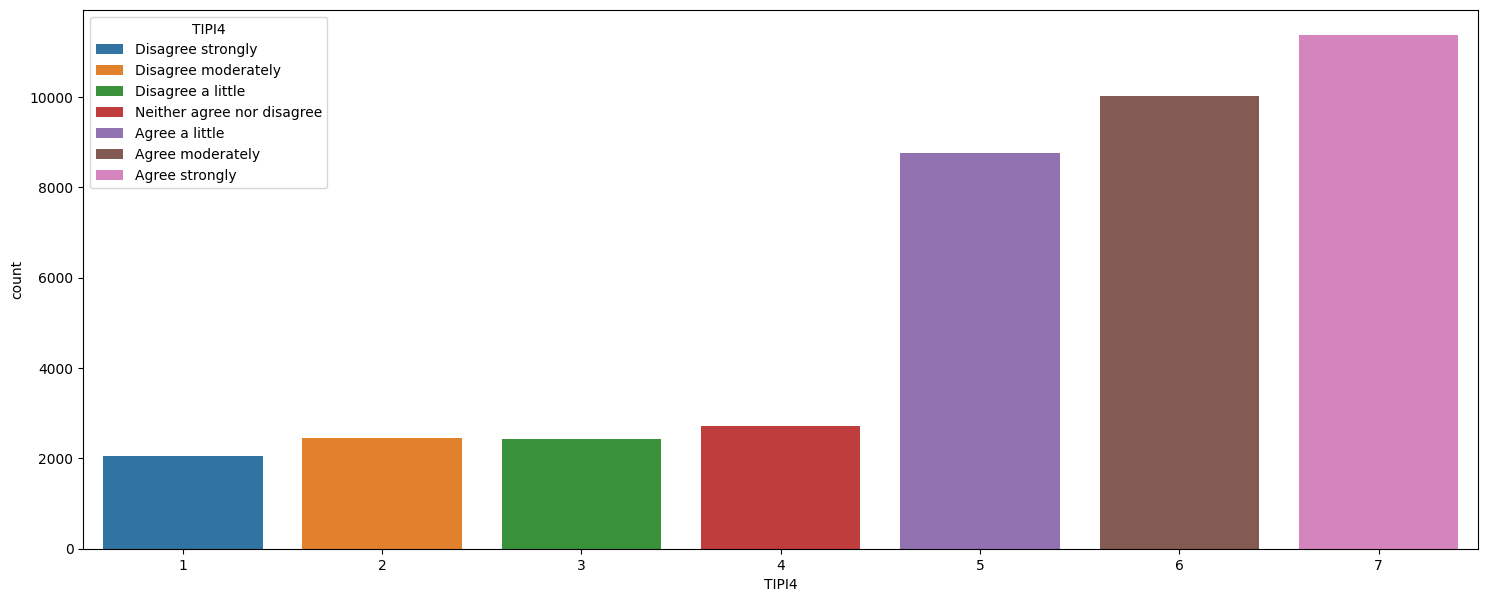

In [ ]:
# change 0 value to 5 as it's the most chosen value in the survey
depression['TIPI4'] = depression['TIPI4'].apply(lambda value: changeFromToinTIPI(value, 0, 6))

# convert numbers to string for better viz
tipi = depression['TIPI4'].apply(changeTIPIValues)

plt.figure(figsize=(18, 7))
sns.countplot(x=depression['TIPI4'], hue=tipi)

##### <span style="color: coral">7.5 TIPI5 Feature <span>
I see myself as: <span style="color: green">Open to new experiences, complex.</span>

In [ ]:
depression['TIPI5'].value_counts()

6    9697
5    9525
7    7682
4    5140
3    3341
2    2226
1    1647
0     517
Name: TIPI5, dtype: int64

<Axes: xlabel='TIPI5', ylabel='count'>

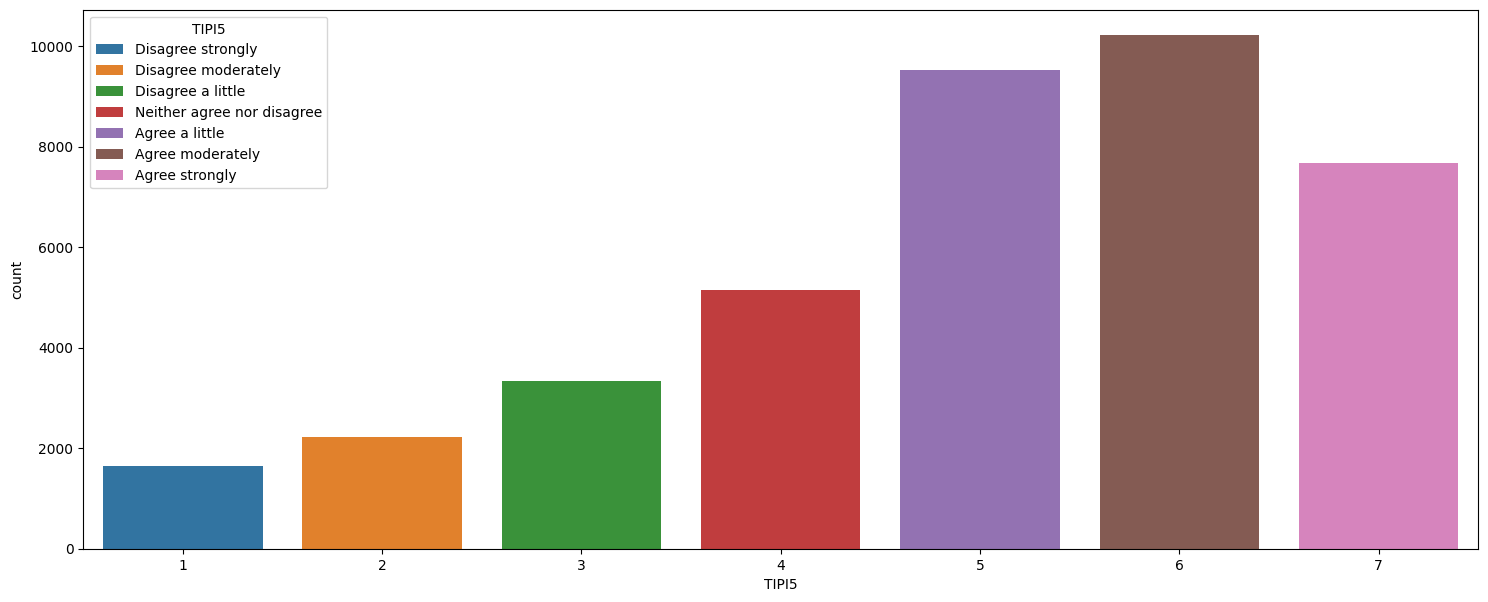

In [ ]:
# change 0 value to 5 as it's the most chosen value in the survey
depression['TIPI5'] = depression['TIPI5'].apply(lambda value: changeFromToinTIPI(value, 0, 6))

# convert numbers to string for better viz
tipi = depression['TIPI5'].apply(changeTIPIValues)

plt.figure(figsize=(18, 7))
sns.countplot(x=depression['TIPI5'], hue=tipi)

##### <span style="color: coral">7.6 TIPI-6 Feature <span>
I see myself as: <span style="color: green">Reserved, quiet.</span>

In [ ]:
depression['TIPI6'].value_counts()

7    9626
6    8094
5    7733
4    4943
3    3475
2    2748
1    2666
0     490
Name: TIPI6, dtype: int64

<Axes: xlabel='TIPI6', ylabel='count'>

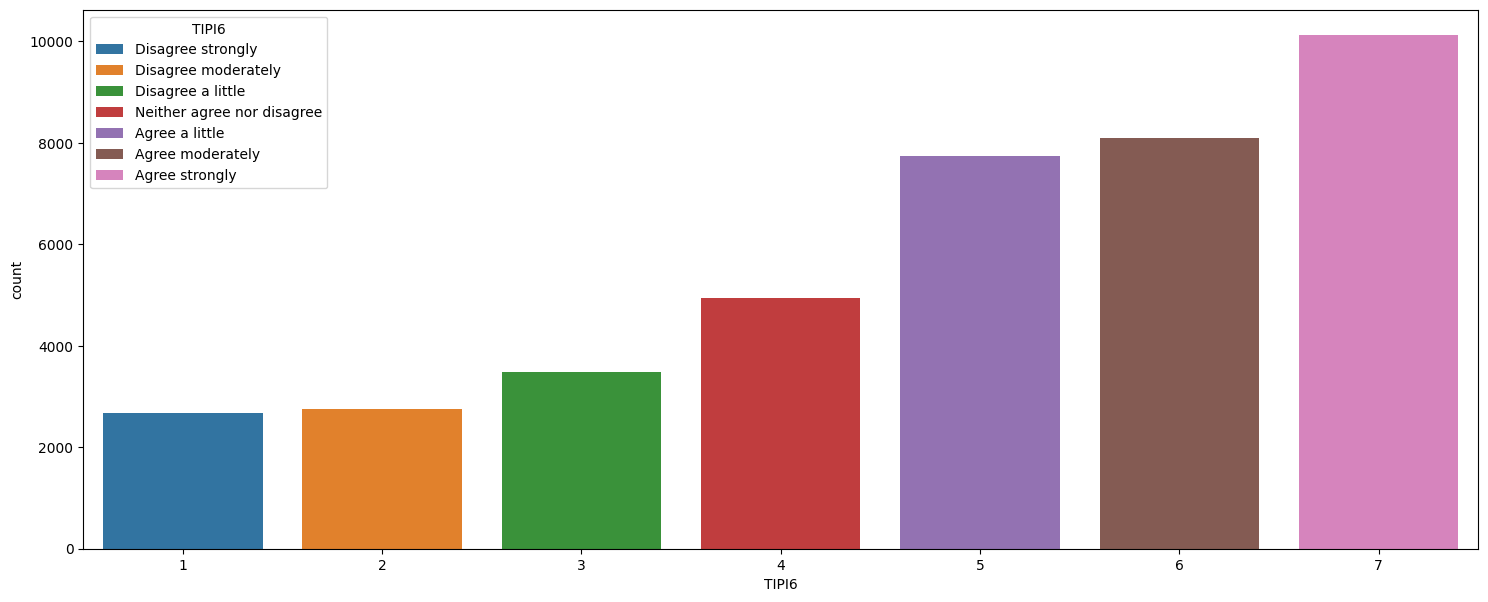

In [ ]:
# change 0 value to 5 as it's the most chosen value in the survey
depression['TIPI6'] = depression['TIPI6'].apply(lambda value: changeFromToinTIPI(value, 0, 7))

# convert numbers to string for better viz
tipi = depression['TIPI6'].apply(changeTIPIValues)

plt.figure(figsize=(18, 7))
sns.countplot(x=depression['TIPI6'], hue=tipi)

##### <span style="color: coral">7.7 TIPI-7 Feature <span>
I see myself as: <span style="color: green">Sympathetic, warm.</span>

In [ ]:
depression['TIPI7'].value_counts()

6    10997
7    10007
5     9097
4     4421
3     2270
2     1367
1     1015
0      601
Name: TIPI7, dtype: int64

<Axes: xlabel='TIPI7', ylabel='count'>

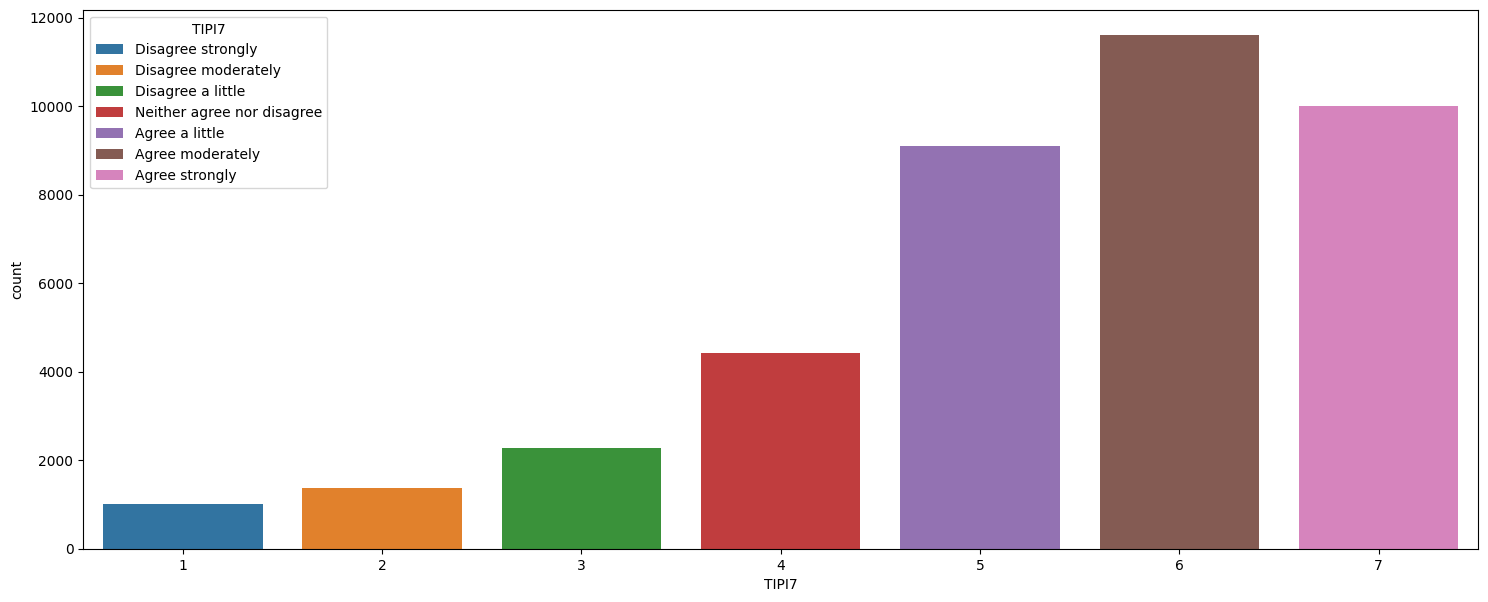

In [ ]:
# change 0 value to 5 as it's the most chosen value in the survey
depression['TIPI7'] = depression['TIPI7'].apply(lambda value: changeFromToinTIPI(value, 0, 6))

# convert numbers to string for better viz
tipi = depression['TIPI7'].apply(changeTIPIValues)

plt.figure(figsize=(18, 7))
sns.countplot(x=depression['TIPI7'], hue=tipi)

##### <span style="color: coral">7.8 TIPI-8 Feature <span>
I see myself as: <span style="color: green">Disorganized, careless.</span>

In [ ]:
depression['TIPI8'].value_counts()

5    9300
6    6369
7    5841
4    4577
3    4446
2    4445
1    4138
0     659
Name: TIPI8, dtype: int64

<Axes: xlabel='TIPI8', ylabel='count'>

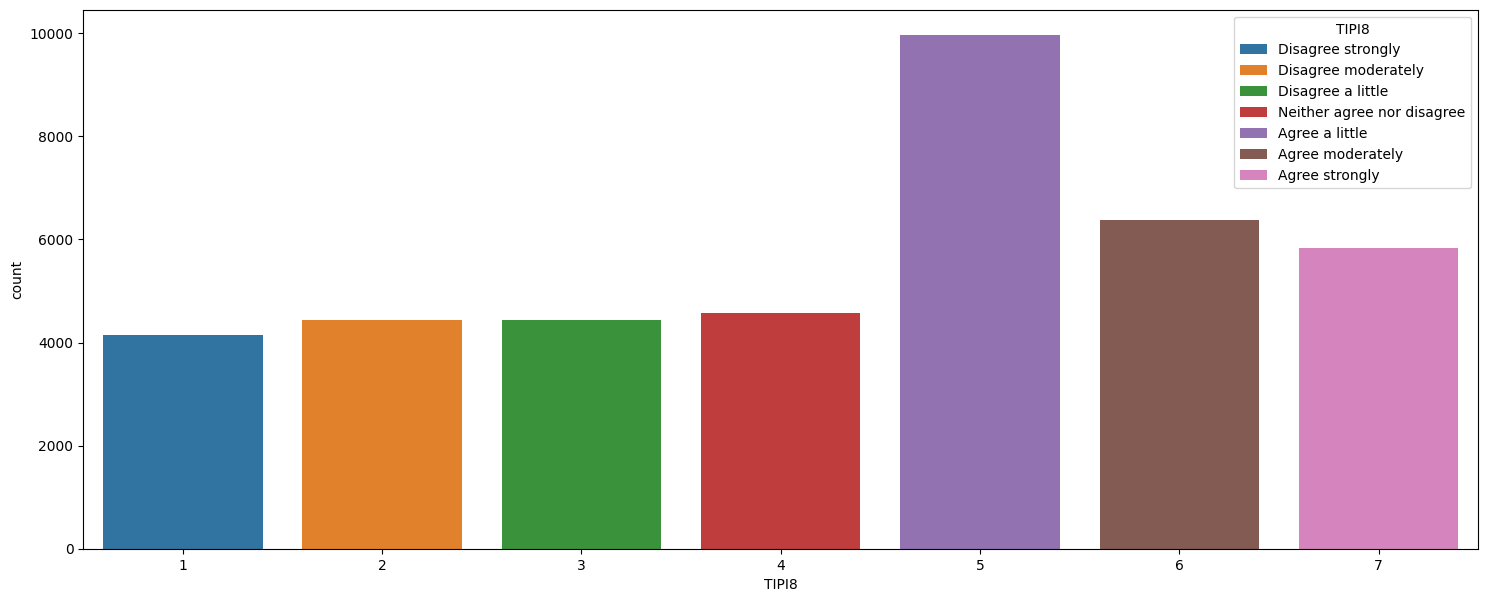

In [ ]:
# change 0 value to 5 as it's the most chosen value in the survey
depression['TIPI8'] = depression['TIPI8'].apply(lambda value: changeFromToinTIPI(value, 0, 5))

# convert numbers to string for better viz
tipi = depression['TIPI8'].apply(changeTIPIValues)

plt.figure(figsize=(18, 7))
sns.countplot(x=depression['TIPI8'], hue=tipi)

##### <span style="color: coral">7.9 TIPI-9 Feature <span>
I see myself as: <span style="color: green">Calm, emotionally stable.</span>

In [ ]:
depression['TIPI9'].value_counts()

4    6837
3    6819
2    6401
5    6250
1    5507
6    4943
7    2591
0     427
Name: TIPI9, dtype: int64

<Axes: xlabel='TIPI9', ylabel='count'>

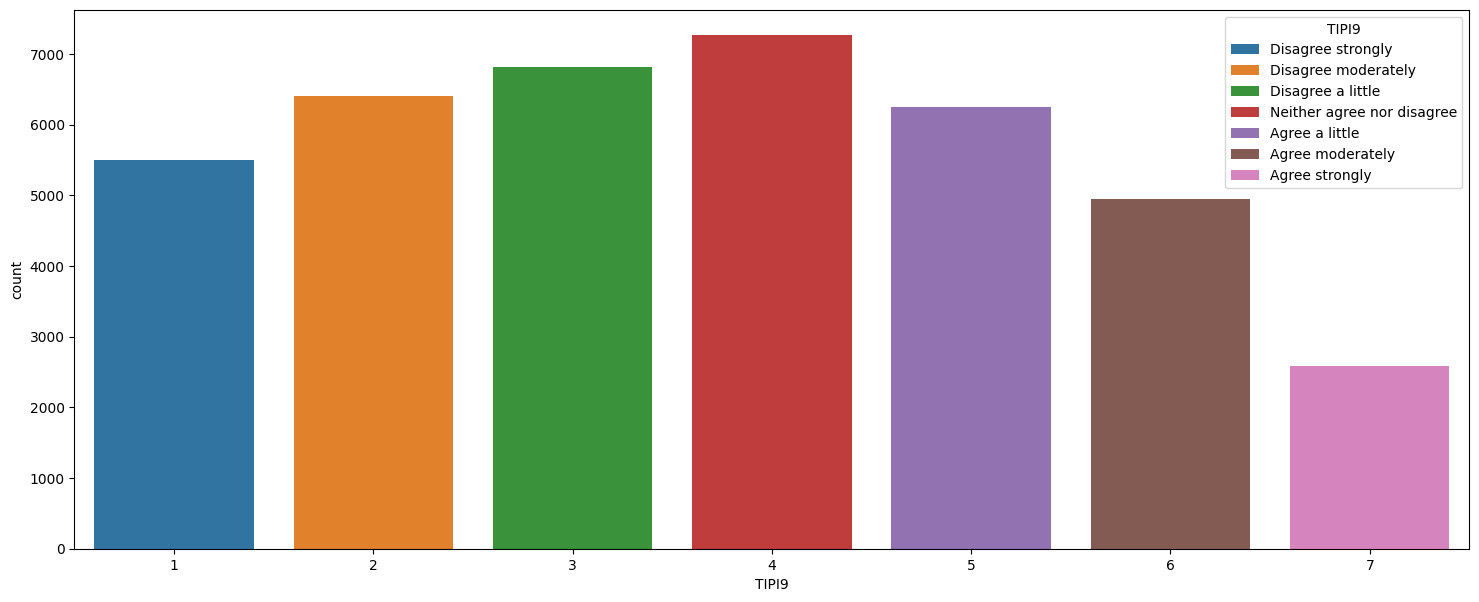

In [ ]:
# change 0 value to 5 as it's the most chosen value in the survey
depression['TIPI9'] = depression['TIPI9'].apply(lambda value: changeFromToinTIPI(value, 0, 4))

# convert numbers to string for better viz
tipi = depression['TIPI9'].apply(changeTIPIValues)

plt.figure(figsize=(18, 7))
sns.countplot(x=depression['TIPI9'], hue=tipi)

##### <span style="color: coral">7.10 TIPI-10 Feature <span>
I see myself as: <span style="color: green">Conventional, uncreative.</span>

In [ ]:
depression['TIPI10'].value_counts()

4    7665
5    6653
3    6184
2    5714
1    5404
6    4106
7    3494
0     555
Name: TIPI10, dtype: int64

<Axes: xlabel='TIPI10', ylabel='count'>

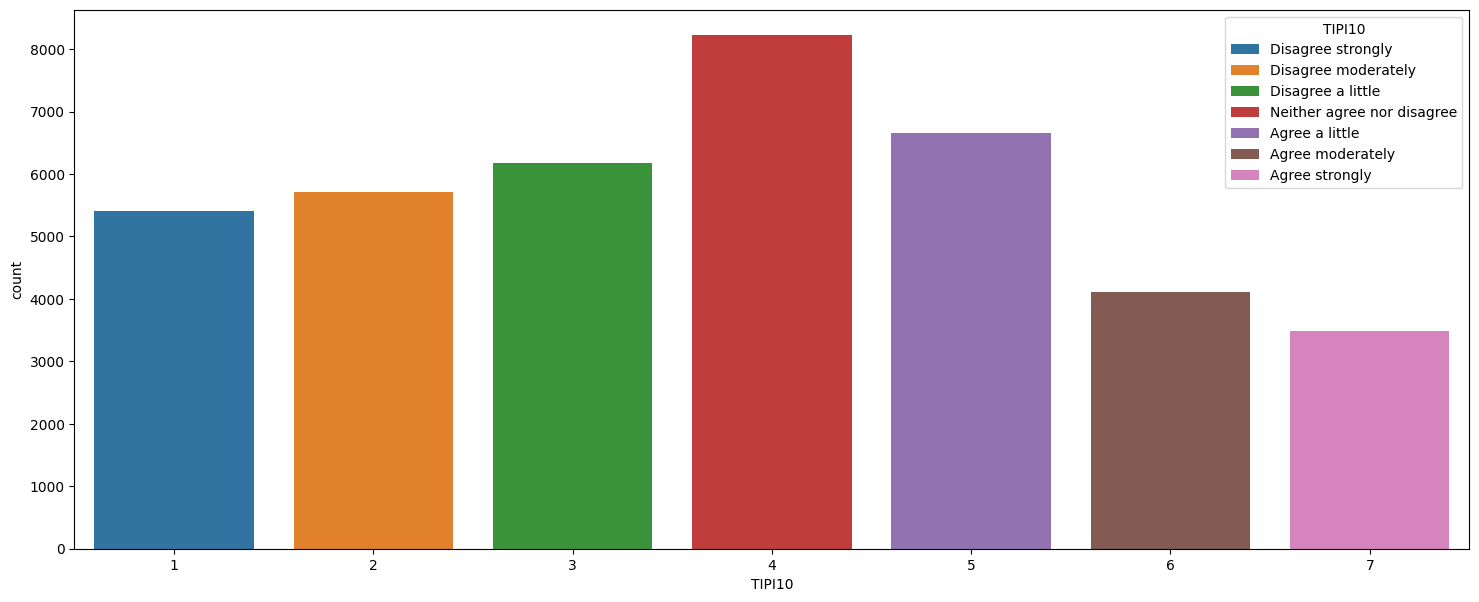

In [ ]:
# change 0 value to 5 as it's the most chosen value in the survey
depression['TIPI10'] = depression['TIPI10'].apply(lambda value: changeFromToinTIPI(value, 0, 4))

# convert numbers to string for better viz
tipi = depression['TIPI10'].apply(changeTIPIValues)

plt.figure(figsize=(18, 7))
sns.countplot(x=depression['TIPI10'], hue=tipi)

#### 8. FamilySize Feature

Let's see how many family size for people and remove outliers if exist

In [ ]:
depression['familysize'].value_counts()

3      9206
2      9018
4      7539
5      4830
1      2946
6      2450
7      1243
0      1125
8       676
9       331
10      195
11      109
12       56
13       19
14        8
15        6
16        5
17        3
24        1
23        1
21        1
19        1
62        1
26        1
65        1
54        1
99        1
133       1
Name: familysize, dtype: int64

<ipython-input-256-5b4a6c197b5b>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=depression['familysize'])


<Axes: ylabel='Density'>

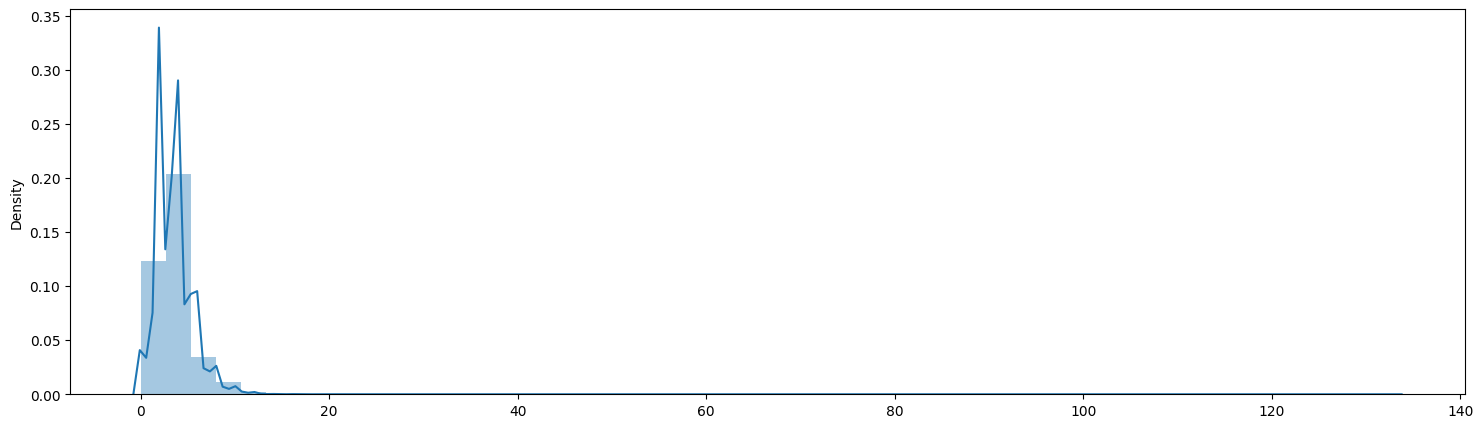

In [ ]:
plt.figure(figsize=(18, 5))
sns.distplot(x=depression['familysize'])

<strong style="color: orange; font-size: 20px">See!!</strong> It seems that there are outliers, so we'll remove records that has familysize more than
<strong style="color: green; font-size: 15px">13</strong>

In [ ]:
# remove reocrds that has family size more than 13
indexes = depression[depression['familysize'] > 13].index

# reomve these indexes from dataframe
print(f'Depression size before: {depression.shape[0]}')
depression = depression.drop(indexes, axis=0)
print(f'Depression size after: {depression.shape[0]}')

Depression size before: 39775
Depression size after: 39743


<ipython-input-258-5b4a6c197b5b>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=depression['familysize'])


<Axes: ylabel='Density'>

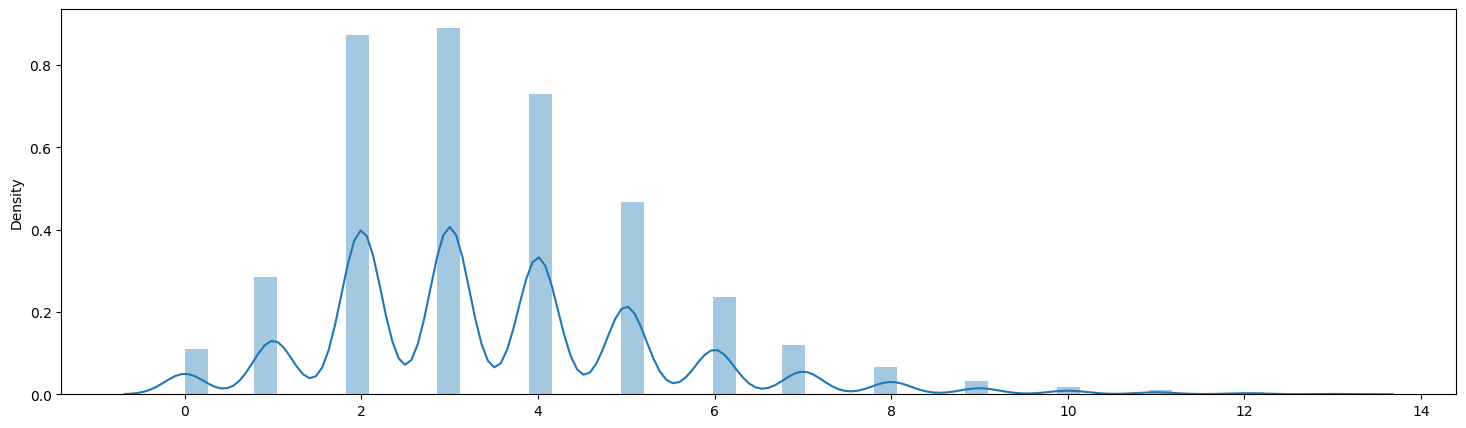

In [ ]:
plt.figure(figsize=(18, 5))
sns.distplot(x=depression['familysize'])

Now, it's kinda of normally distributed

#### 9. Married Feature

In [ ]:
depression['married'].value_counts()

1    34104
2     4354
3     1090
0      195
Name: married, dtype: int64

most prople who participated in the survey never married, so let's change 0 value to 1 since 0 means null here

people who didn't answer this question the survey describe it as 0 value

<Axes: xlabel='married', ylabel='count'>

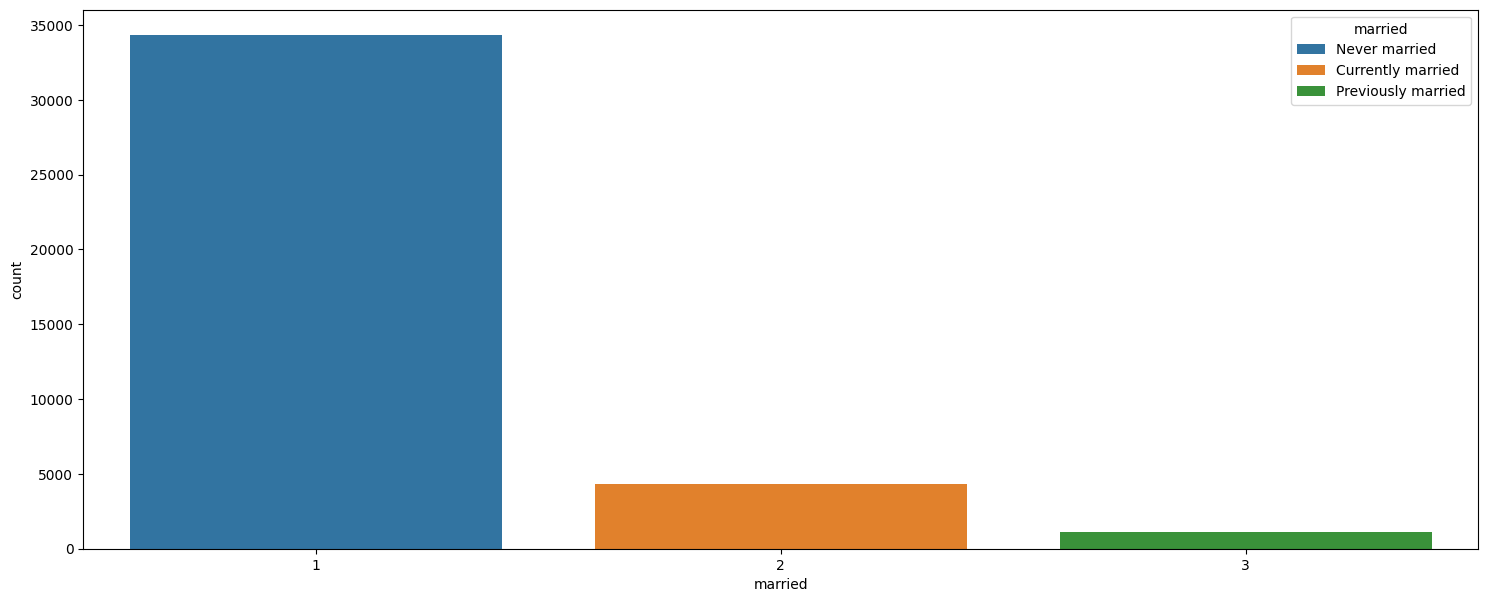

In [ ]:
def change0to1inMarried(value):
    if value == 0:
        return 1
    return value

# change 0 to 1 value as it is the most answered one
depression['married'] = depression['married'].apply(change0to1inMarried)

def changeMarriedValueToString(value):
    if value == 1:
        return 'Never married'
    if value == 2:
        return 'Currently married'
    if value == 3:
        return 'Previously married'
    return value

# change numbers to strings for better viz
married = depression['married'].apply(changeMarriedValueToString)


plt.figure(figsize=(18, 7))
sns.countplot(x=depression['married'], hue=married)

Most people who participated are not married yet

In [ ]:
depression.head()

,Q1A,Q2A,Q3A,Q4A,Q5A,Q6A,Q7A,Q8A,Q9A,Q10A,Q11A,Q12A,Q13A,Q14A,Q15A,Q16A,Q17A,Q18A,Q19A,Q20A,Q21A,Q22A,Q23A,Q24A,Q25A,Q26A,Q27A,Q28A,Q29A,Q30A,Q31A,Q32A,Q33A,Q34A,Q35A,Q36A,Q37A,Q38A,Q39A,Q40A,Q41A,Q42A,TIPI1,TIPI2,TIPI3,TIPI4,TIPI5,TIPI6,TIPI7,TIPI8,TIPI9,TIPI10,education,urban,gender,age,religion,race,married,familysize
0,4,4,2,4,4,4,4,4,2,1,4,4,4,4,4,4,3,4,3,3,1,4,4,4,4,4,4,3,4,2,4,4,2,3,4,4,1,2,4,3,4,4,1,5,7,7,7,7,7,5,1,1,2,3,2,16,12,1.0,1,2
1,4,1,2,3,4,4,3,4,3,2,2,2,4,4,3,3,4,2,1,1,2,3,1,2,2,3,3,4,3,3,2,3,3,2,2,3,4,2,2,1,2,2,6,5,4,7,5,4,7,7,1,5,2,3,2,16,7,7.0,1,4
2,3,1,4,1,4,3,1,3,2,4,2,1,4,1,4,4,4,2,2,1,4,3,2,4,2,1,2,1,2,2,4,3,1,4,3,4,4,4,2,2,1,4,2,5,2,2,5,6,5,5,3,2,2,3,2,17,4,6.0,1,3
3,2,3,2,1,3,3,4,2,3,3,2,1,1,4,2,2,3,1,1,2,1,1,1,1,1,2,4,1,3,3,3,1,2,4,1,1,2,1,3,4,4,2,1,1,7,4,6,4,6,1,6,1,1,3,2,13,4,7.0,1,5
4,2,2,3,4,4,2,4,4,4,3,2,4,4,4,4,3,4,4,4,4,3,3,4,2,4,4,2,4,2,4,3,4,4,4,3,4,3,3,3,4,4,3,2,5,3,6,5,5,5,6,3,3,3,2,2,19,10,1.0,1,4


#### 10. Age Feature

In [ ]:
display(depression['age'].value_counts())


20      3788
21      3532
19      3506
18      3045
22      3006
        ... 
89         1
1996       1
223        1
78         1
1991       1
Name: age, Length: 78, dtype: int64

<strong style="color: orange; font-size: 20px">See!!</strong> It seems that there are outliers that need to be removed

In [ ]:
# remove age > 80 years old

age_indexes = depression[depression['age'] > 80]['age'].index

display(age_indexes) # figure out how many

# remove these indexes
print(f'Depression size before: {depression.shape[0]}')
depression.drop(age_indexes, axis=0, inplace=True)
print(f'Depression size after: {depression.shape[0]}')


Int64Index([527, 5340, 10231, 10878, 14236, 14367, 21383, 24898, 30027, 33730], dtype='int64')

Depression size before: 39743
Depression size after: 39733


<Axes: xlabel='age'>

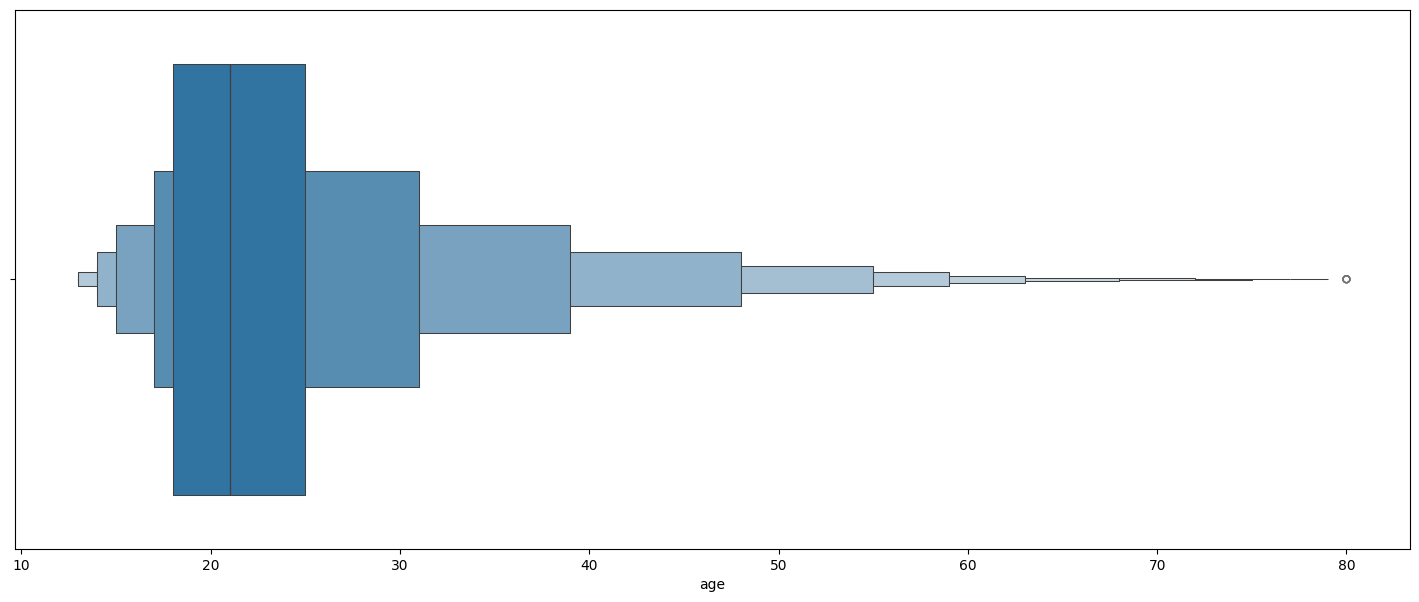

In [ ]:
# show viz
plt.figure(figsize=(18, 7))
sns.boxenplot(x=depression['age'])

**Now let's create age_group feature to range the people ages and drop age feature**

<Axes: xlabel='age', ylabel='count'>

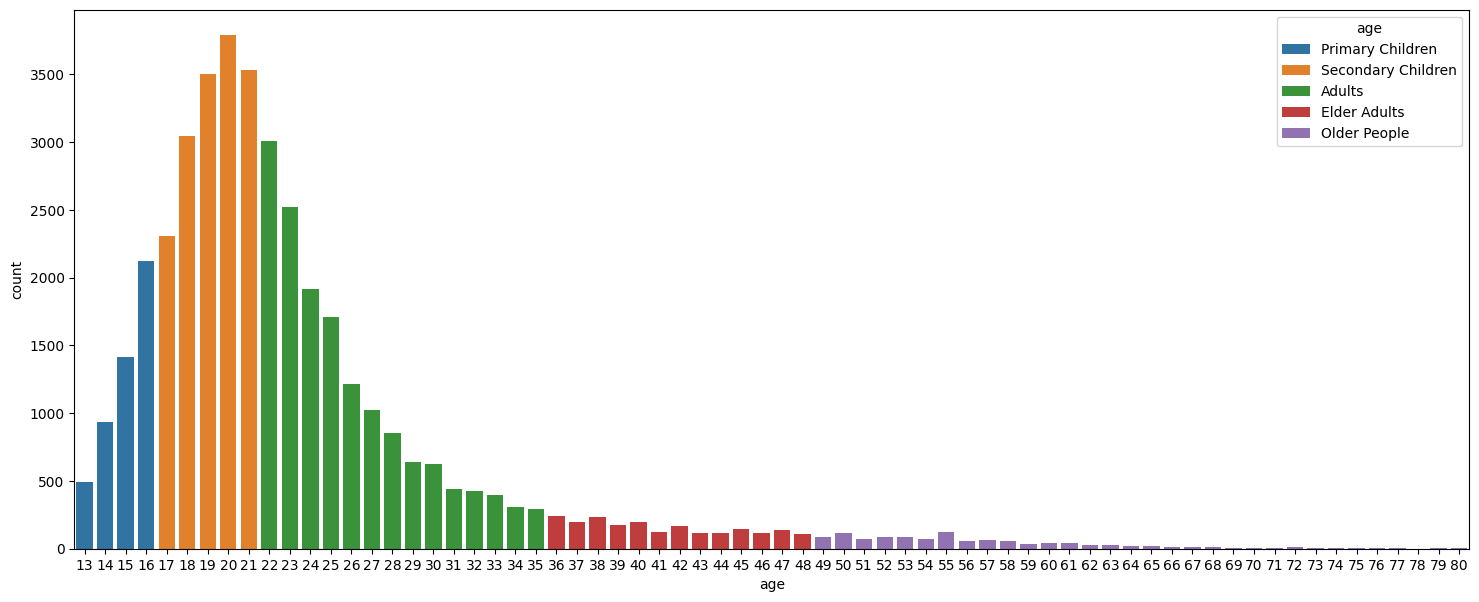

In [ ]:
def makeAgeGroup(value):
    if value <= 10:
        return 'Under 10'
    if  10 <= value <= 16:
        return 'Primary Children'
    if 17 <= value <= 21:
        return 'Secondary Children'
    if 21 <= value <= 35:
        return 'Adults'
    if 36 <= value <= 48:
        return 'Elder Adults'
    if value >= 49:
        return 'Older People'

age = depression['age'].apply(makeAgeGroup)

plt.figure(figsize=(18, 7))
sns.countplot(x=depression['age'], hue=age)

It seems that the most people who participated in the survey are Secondary and Adults

In [ ]:
# create age_group feature
def makeAgeGroupFeature(value):
    if value <= 10:
        return 1
    if  10 <= value <= 16:
        return 2
    if 17 <= value <= 21:
        return 3
    if 21 <= value <= 35:
        return 4
    if 36 <= value <= 48:
        return 5
    if value >= 49:
        return 6

depression['age_group'] = depression['age'].apply(makeAgeGroupFeature)

depression.head()

,Q1A,Q2A,Q3A,Q4A,Q5A,Q6A,Q7A,Q8A,Q9A,Q10A,Q11A,Q12A,Q13A,Q14A,Q15A,Q16A,Q17A,Q18A,Q19A,Q20A,Q21A,Q22A,Q23A,Q24A,Q25A,Q26A,Q27A,Q28A,Q29A,Q30A,Q31A,Q32A,Q33A,Q34A,Q35A,Q36A,Q37A,Q38A,Q39A,Q40A,Q41A,Q42A,TIPI1,TIPI2,TIPI3,TIPI4,TIPI5,TIPI6,TIPI7,TIPI8,TIPI9,TIPI10,education,urban,gender,age,religion,race,married,familysize,age_group
0,4,4,2,4,4,4,4,4,2,1,4,4,4,4,4,4,3,4,3,3,1,4,4,4,4,4,4,3,4,2,4,4,2,3,4,4,1,2,4,3,4,4,1,5,7,7,7,7,7,5,1,1,2,3,2,16,12,1.0,1,2,2
1,4,1,2,3,4,4,3,4,3,2,2,2,4,4,3,3,4,2,1,1,2,3,1,2,2,3,3,4,3,3,2,3,3,2,2,3,4,2,2,1,2,2,6,5,4,7,5,4,7,7,1,5,2,3,2,16,7,7.0,1,4,2
2,3,1,4,1,4,3,1,3,2,4,2,1,4,1,4,4,4,2,2,1,4,3,2,4,2,1,2,1,2,2,4,3,1,4,3,4,4,4,2,2,1,4,2,5,2,2,5,6,5,5,3,2,2,3,2,17,4,6.0,1,3,3
3,2,3,2,1,3,3,4,2,3,3,2,1,1,4,2,2,3,1,1,2,1,1,1,1,1,2,4,1,3,3,3,1,2,4,1,1,2,1,3,4,4,2,1,1,7,4,6,4,6,1,6,1,1,3,2,13,4,7.0,1,5,2
4,2,2,3,4,4,2,4,4,4,3,2,4,4,4,4,3,4,4,4,4,3,3,4,2,4,4,2,4,2,4,3,4,4,4,3,4,3,3,3,4,4,3,2,5,3,6,5,5,5,6,3,3,3,2,2,19,10,1.0,1,4,3


Drop Age Feature

In [ ]:
depression.drop('age', axis=1, inplace=True)
depression.head()

,Q1A,Q2A,Q3A,Q4A,Q5A,Q6A,Q7A,Q8A,Q9A,Q10A,Q11A,Q12A,Q13A,Q14A,Q15A,Q16A,Q17A,Q18A,Q19A,Q20A,Q21A,Q22A,Q23A,Q24A,Q25A,Q26A,Q27A,Q28A,Q29A,Q30A,Q31A,Q32A,Q33A,Q34A,Q35A,Q36A,Q37A,Q38A,Q39A,Q40A,Q41A,Q42A,TIPI1,TIPI2,TIPI3,TIPI4,TIPI5,TIPI6,TIPI7,TIPI8,TIPI9,TIPI10,education,urban,gender,religion,race,married,familysize,age_group
0,4,4,2,4,4,4,4,4,2,1,4,4,4,4,4,4,3,4,3,3,1,4,4,4,4,4,4,3,4,2,4,4,2,3,4,4,1,2,4,3,4,4,1,5,7,7,7,7,7,5,1,1,2,3,2,12,1.0,1,2,2
1,4,1,2,3,4,4,3,4,3,2,2,2,4,4,3,3,4,2,1,1,2,3,1,2,2,3,3,4,3,3,2,3,3,2,2,3,4,2,2,1,2,2,6,5,4,7,5,4,7,7,1,5,2,3,2,7,7.0,1,4,2
2,3,1,4,1,4,3,1,3,2,4,2,1,4,1,4,4,4,2,2,1,4,3,2,4,2,1,2,1,2,2,4,3,1,4,3,4,4,4,2,2,1,4,2,5,2,2,5,6,5,5,3,2,2,3,2,4,6.0,1,3,3
3,2,3,2,1,3,3,4,2,3,3,2,1,1,4,2,2,3,1,1,2,1,1,1,1,1,2,4,1,3,3,3,1,2,4,1,1,2,1,3,4,4,2,1,1,7,4,6,4,6,1,6,1,1,3,2,4,7.0,1,5,2
4,2,2,3,4,4,2,4,4,4,3,2,4,4,4,4,3,4,4,4,4,3,3,4,2,4,4,2,4,2,4,3,4,4,4,3,4,3,3,3,4,4,3,2,5,3,6,5,5,5,6,3,3,3,2,2,10,1.0,1,4,3


#### Let's create <strong style="color: green;">Total_Count Feature</strong>

Now to build target feature we need to sum all values to new feature and see how to split it to multiple classes

In [ ]:
depression['total_count']  = depression.sum(axis=1)
depression.head()

,Q1A,Q2A,Q3A,Q4A,Q5A,Q6A,Q7A,Q8A,Q9A,Q10A,Q11A,Q12A,Q13A,Q14A,Q15A,Q16A,Q17A,Q18A,Q19A,Q20A,Q21A,Q22A,Q23A,Q24A,Q25A,Q26A,Q27A,Q28A,Q29A,Q30A,Q31A,Q32A,Q33A,Q34A,Q35A,Q36A,Q37A,Q38A,Q39A,Q40A,Q41A,Q42A,TIPI1,TIPI2,TIPI3,TIPI4,TIPI5,TIPI6,TIPI7,TIPI8,TIPI9,TIPI10,education,urban,gender,religion,race,married,familysize,age_group,total_count
0,4,4,2,4,4,4,4,4,2,1,4,4,4,4,4,4,3,4,3,3,1,4,4,4,4,4,4,3,4,2,4,4,2,3,4,4,1,2,4,3,4,4,1,5,7,7,7,7,7,5,1,1,2,3,2,12,1.0,1,2,2,216.0
1,4,1,2,3,4,4,3,4,3,2,2,2,4,4,3,3,4,2,1,1,2,3,1,2,2,3,3,4,3,3,2,3,3,2,2,3,4,2,2,1,2,2,6,5,4,7,5,4,7,7,1,5,2,3,2,7,7.0,1,4,2,189.0
2,3,1,4,1,4,3,1,3,2,4,2,1,4,1,4,4,4,2,2,1,4,3,2,4,2,1,2,1,2,2,4,3,1,4,3,4,4,4,2,2,1,4,2,5,2,2,5,6,5,5,3,2,2,3,2,4,6.0,1,3,3,171.0
3,2,3,2,1,3,3,4,2,3,3,2,1,1,4,2,2,3,1,1,2,1,1,1,1,1,2,4,1,3,3,3,1,2,4,1,1,2,1,3,4,4,2,1,1,7,4,6,4,6,1,6,1,1,3,2,4,7.0,1,5,2,153.0
4,2,2,3,4,4,2,4,4,4,3,2,4,4,4,4,3,4,4,4,4,3,3,4,2,4,4,2,4,2,4,3,4,4,4,3,4,3,3,3,4,4,3,2,5,3,6,5,5,5,6,3,3,3,2,2,10,1.0,1,4,3,212.0


In [ ]:
depression['total_count'].describe()

count    39733.000000
mean       171.074648
std         30.897739
min         71.000000
25%        147.000000
50%        170.000000
75%        194.000000
max        270.000000
Name: total_count, dtype: float64

<ipython-input-270-e094b42c7059>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=depression['total_count'])


<Axes: ylabel='Density'>

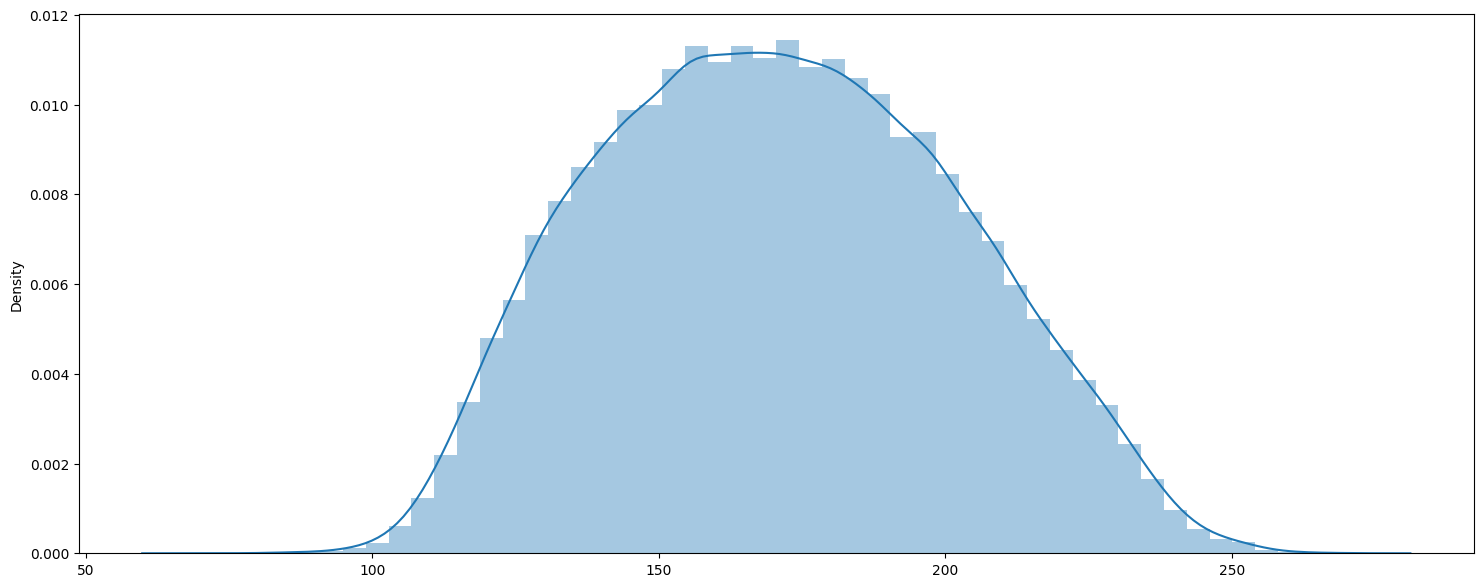

In [ ]:
plt.figure(figsize=(18, 7))
sns.distplot(x=depression['total_count'])

It seems that total_count is normaly distributed, so <strong>Now</strong> let's split it to five categories

<ol>
    <li>Normal</li>
    <li>Mild</li>
    <li>Moderate</li>
    <li>Severe</li>
    <li>Extremely Severe</li>
</ol>

In [ ]:
depression['total_count'].describe()

count    39733.000000
mean       171.074648
std         30.897739
min         71.000000
25%        147.000000
50%        170.000000
75%        194.000000
max        270.000000
Name: total_count, dtype: float64

the mean is 170 which will be the value of <strong>Moderate</strong> will be under 170

In [ ]:
# let's divide the values under 170 to split moderate to another values
depression[depression['total_count'] < 170]['total_count'].describe()

count    19534.000000
mean       145.019812
std         15.980373
min         71.000000
25%        133.000000
50%        147.000000
75%        158.000000
max        169.000000
Name: total_count, dtype: float64

Now we'll choose <strong>Mild</strong> as value under 147

In [ ]:
# let's divide the values under 147 to split Mild to another value
depression[depression['total_count'] < 147]['total_count'].describe()

count    9633.000000
mean      131.469843
std        10.564141
min        71.000000
25%       124.000000
50%       133.000000
75%       140.000000
max       146.000000
Name: total_count, dtype: float64

Now we'll choose <strong>Normal</strong> as value under 133

**Now Do the Opposite to select above Moderate value for Sever and Exteremly Sever**

In [ ]:
# let's divide the values above 170 to split moderate to another values
depression[depression['total_count'] > 170]['total_count'].describe()

count    19760.000000
mean       196.855364
std         18.204392
min        171.000000
25%        182.000000
50%        194.000000
75%        209.000000
max        270.000000
Name: total_count, dtype: float64

Now we'll choose **Severe** as value 194 and bellow

Also we'll choose **Extremely Severe** above 194

In [ ]:
def buildTarget(value):
    if value <= 133:
        return 'Normal'
    if 133 < value <= 147:
        return 'Mild'
    if 147 < value <= 170:
        return 'Moderate'
    if 170 < value <= 194:
        return 'Severe'
    if value > 194:
        return 'Extremely Severe'


# build target feature
depression['target'] = depression['total_count'].apply(buildTarget)

depression.head()

,Q1A,Q2A,Q3A,Q4A,Q5A,Q6A,Q7A,Q8A,Q9A,Q10A,Q11A,Q12A,Q13A,Q14A,Q15A,Q16A,Q17A,Q18A,Q19A,Q20A,Q21A,Q22A,Q23A,Q24A,Q25A,Q26A,Q27A,Q28A,Q29A,Q30A,Q31A,Q32A,Q33A,Q34A,Q35A,Q36A,Q37A,Q38A,Q39A,Q40A,Q41A,Q42A,TIPI1,TIPI2,TIPI3,TIPI4,TIPI5,TIPI6,TIPI7,TIPI8,TIPI9,TIPI10,education,urban,gender,religion,race,married,familysize,age_group,total_count,target
0,4,4,2,4,4,4,4,4,2,1,4,4,4,4,4,4,3,4,3,3,1,4,4,4,4,4,4,3,4,2,4,4,2,3,4,4,1,2,4,3,4,4,1,5,7,7,7,7,7,5,1,1,2,3,2,12,1.0,1,2,2,216.0,Extremely Severe
1,4,1,2,3,4,4,3,4,3,2,2,2,4,4,3,3,4,2,1,1,2,3,1,2,2,3,3,4,3,3,2,3,3,2,2,3,4,2,2,1,2,2,6,5,4,7,5,4,7,7,1,5,2,3,2,7,7.0,1,4,2,189.0,Severe
2,3,1,4,1,4,3,1,3,2,4,2,1,4,1,4,4,4,2,2,1,4,3,2,4,2,1,2,1,2,2,4,3,1,4,3,4,4,4,2,2,1,4,2,5,2,2,5,6,5,5,3,2,2,3,2,4,6.0,1,3,3,171.0,Severe
3,2,3,2,1,3,3,4,2,3,3,2,1,1,4,2,2,3,1,1,2,1,1,1,1,1,2,4,1,3,3,3,1,2,4,1,1,2,1,3,4,4,2,1,1,7,4,6,4,6,1,6,1,1,3,2,4,7.0,1,5,2,153.0,Moderate
4,2,2,3,4,4,2,4,4,4,3,2,4,4,4,4,3,4,4,4,4,3,3,4,2,4,4,2,4,2,4,3,4,4,4,3,4,3,3,3,4,4,3,2,5,3,6,5,5,5,6,3,3,3,2,2,10,1.0,1,4,3,212.0,Extremely Severe


Now let's see the target distribution

<Axes: xlabel='target', ylabel='count'>

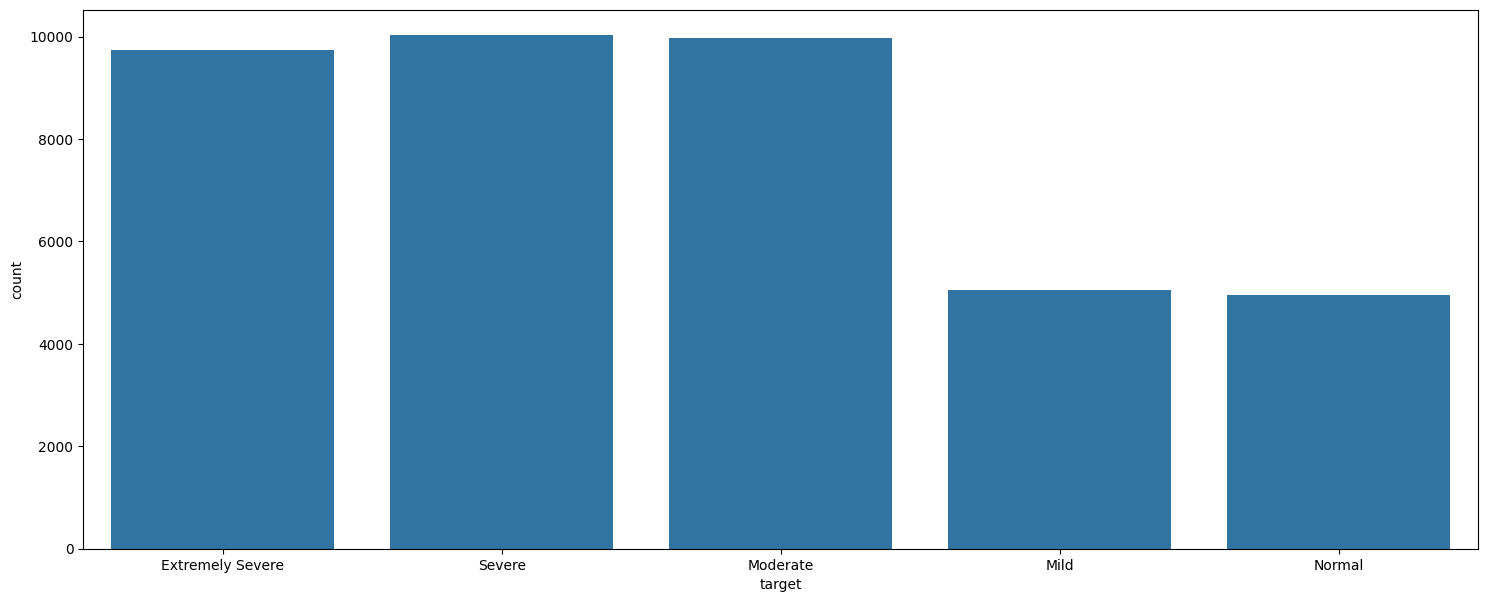

In [ ]:
plt.figure(figsize=(18, 7))
sns.countplot(x=depression['target'])

<strong style="color: red; font-size: 25px">Nooo!</strong> data is <strong>imbalanced 🥲</strong> but that's okay we'll move 10 steps forward to make it balanced 🙂😅

<Axes: xlabel='target', ylabel='count'>

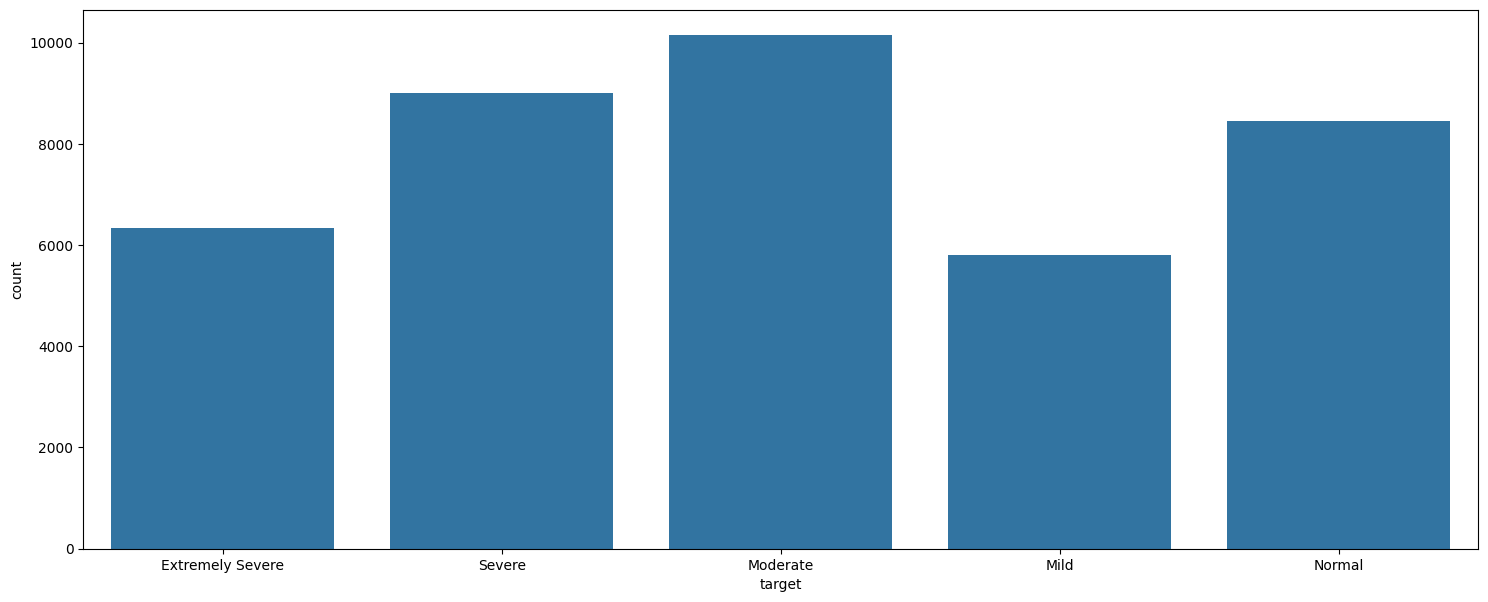

In [ ]:
def buildTargetMove15Steps(value):
    if value <= 143:
        return 'Normal'
    if 143 < value <= 157:
        return 'Mild'
    if 157 < value <= 180:
        return 'Moderate'
    if 180 < value <= 204:
        return 'Severe'
    if value > 204:
        return 'Extremely Severe'


# build target feature
depression['target'] = depression['total_count'].apply(buildTargetMove15Steps)

# Let's visualize to see
plt.figure(figsize=(18, 7))
sns.countplot(x=depression['target'])

<strong style="color: green">Greaaaaaat!!!</strong>

 Data it's <span style="color: #2cb72c;">balanced</span> Now

In [ ]:
depression.head()

,Q1A,Q2A,Q3A,Q4A,Q5A,Q6A,Q7A,Q8A,Q9A,Q10A,Q11A,Q12A,Q13A,Q14A,Q15A,Q16A,Q17A,Q18A,Q19A,Q20A,Q21A,Q22A,Q23A,Q24A,Q25A,Q26A,Q27A,Q28A,Q29A,Q30A,Q31A,Q32A,Q33A,Q34A,Q35A,Q36A,Q37A,Q38A,Q39A,Q40A,Q41A,Q42A,TIPI1,TIPI2,TIPI3,TIPI4,TIPI5,TIPI6,TIPI7,TIPI8,TIPI9,TIPI10,education,urban,gender,religion,race,married,familysize,age_group,total_count,target
0,4,4,2,4,4,4,4,4,2,1,4,4,4,4,4,4,3,4,3,3,1,4,4,4,4,4,4,3,4,2,4,4,2,3,4,4,1,2,4,3,4,4,1,5,7,7,7,7,7,5,1,1,2,3,2,12,1.0,1,2,2,216.0,Extremely Severe
1,4,1,2,3,4,4,3,4,3,2,2,2,4,4,3,3,4,2,1,1,2,3,1,2,2,3,3,4,3,3,2,3,3,2,2,3,4,2,2,1,2,2,6,5,4,7,5,4,7,7,1,5,2,3,2,7,7.0,1,4,2,189.0,Severe
2,3,1,4,1,4,3,1,3,2,4,2,1,4,1,4,4,4,2,2,1,4,3,2,4,2,1,2,1,2,2,4,3,1,4,3,4,4,4,2,2,1,4,2,5,2,2,5,6,5,5,3,2,2,3,2,4,6.0,1,3,3,171.0,Moderate
3,2,3,2,1,3,3,4,2,3,3,2,1,1,4,2,2,3,1,1,2,1,1,1,1,1,2,4,1,3,3,3,1,2,4,1,1,2,1,3,4,4,2,1,1,7,4,6,4,6,1,6,1,1,3,2,4,7.0,1,5,2,153.0,Mild
4,2,2,3,4,4,2,4,4,4,3,2,4,4,4,4,3,4,4,4,4,3,3,4,2,4,4,2,4,2,4,3,4,4,4,3,4,3,3,3,4,4,3,2,5,3,6,5,5,5,6,3,3,3,2,2,10,1.0,1,4,3,212.0,Extremely Severe


In [ ]:
depression.columns

Index(['Q1A', 'Q2A', 'Q3A', 'Q4A', 'Q5A', 'Q6A', 'Q7A', 'Q8A', 'Q9A', 'Q10A',
       'Q11A', 'Q12A', 'Q13A', 'Q14A', 'Q15A', 'Q16A', 'Q17A', 'Q18A', 'Q19A',
       'Q20A', 'Q21A', 'Q22A', 'Q23A', 'Q24A', 'Q25A', 'Q26A', 'Q27A', 'Q28A',
       'Q29A', 'Q30A', 'Q31A', 'Q32A', 'Q33A', 'Q34A', 'Q35A', 'Q36A', 'Q37A',
       'Q38A', 'Q39A', 'Q40A', 'Q41A', 'Q42A', 'TIPI1', 'TIPI2', 'TIPI3',
       'TIPI4', 'TIPI5', 'TIPI6', 'TIPI7', 'TIPI8', 'TIPI9', 'TIPI10',
       'education', 'urban', 'gender', 'religion', 'race', 'married',
       'familysize', 'age_group', 'total_count', 'target'],
      dtype='object')

### Split dataset ✂️

In [ ]:
# split target from depression dataset
target = depression['target']
depression.drop(['target', 'total_count'], axis=1, inplace=True) # drop target and total_count

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(depression, target, test_size=.2)

print(f'x_train: {x_train.shape}, y_train: {y_train.shape}')
print(f'x_test: {x_test.shape}, y_test: {y_test.shape}')

x_train: (31786, 60), y_train: (31786,)
x_test: (7947, 60), y_test: (7947,)


### Scale the data ⚖️

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = MinMaxScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

### Build the Model 🏗️🏨

#### 1️⃣ RandomForest Model

In [ ]:
%%time
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=SEED)
rnd_clf.fit(x_train_scaled, y_train)


CPU times: user 8.34 s, sys: 105 ms, total: 8.45 s
Wall time: 6.26 s


RandomForestClassifier(n_jobs=-1, random_state=42)

In [ ]:
rnd_clf.score(x_test_scaled, y_test)

0.7727444318610797

In [ ]:
# Predict
from sklearn.metrics import confusion_matrix

y_pred_rnd = rnd_clf.predict(x_test_scaled)

confusion_matrix(y_test, y_pred_rnd)

array([[1066,    0,    0,    0,  245],
       [   0,  582,  407,  210,    1],
       [   0,  154, 1636,    7,  227],
       [   0,  176,   15, 1490,    0],
       [ 105,    1,  258,    0, 1367]])

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_rnd))

                  precision    recall  f1-score   support

Extremely Severe       0.91      0.81      0.86      1311
            Mild       0.64      0.48      0.55      1200
        Moderate       0.71      0.81      0.75      2024
          Normal       0.87      0.89      0.88      1681
          Severe       0.74      0.79      0.77      1731

        accuracy                           0.77      7947
       macro avg       0.77      0.76      0.76      7947
    weighted avg       0.77      0.77      0.77      7947



#### 2️⃣ SVM Model

In [ ]:
%%time
from sklearn.svm import SVC

svc_clf = SVC()

svc_clf.fit(x_train_scaled, y_train)

CPU times: user 14.9 s, sys: 315 ms, total: 15.2 s
Wall time: 15.3 s


SVC()

In [ ]:
# Cross Validation
from sklearn.model_selection import cross_val_score

cross_score = cross_val_score(svc_clf, x_train_scaled, y_train, cv=5)
print(f'Mean Score {np.mean(cross_score)}')


Mean Score 0.9668407780471805


In [ ]:
svc_clf.score(x_test_scaled, y_test)

0.970554926387316

In [ ]:
from sklearn.metrics import classification_report

y_pred_svc = svc_clf.predict(x_test_scaled)

print(classification_report(y_test, y_pred_svc))

                  precision    recall  f1-score   support

Extremely Severe       0.98      0.97      0.98      1311
            Mild       0.95      0.95      0.95      1200
        Moderate       0.97      0.97      0.97      2024
          Normal       0.99      0.98      0.98      1681
          Severe       0.96      0.97      0.97      1731

        accuracy                           0.97      7947
       macro avg       0.97      0.97      0.97      7947
    weighted avg       0.97      0.97      0.97      7947



Very good, precision and recall are great with SVC

<div style="text-align: center; background: #f7f7f7; padding: 40px 20px; border-radius: 10px">
<h1 style="color: green">Great Job! 🙋🎉💃</h1>
As we see the best model is SVC, let's make some predictions using SVC model
</div>

### Make mannual Values for prediciton 👩‍🌾🏃‍♂️

In [ ]:
# this method used to build random values to use it for testing the model
def buildRandomValuesForPrediction():

    # get random answers for Q1A to Q42A questions
    qaAnswers = []
    for i in range(1, 43):
        qaAnswers.append(np.random.randint(1, 5)) # random from 1 to 4

    # get random answers for TIPI1 to TIPI questions
    tipiAnswers = []
    for i in range(1, 11):
        tipiAnswers.append(np.random.randint(1, 8)) # random from 1 to 7

    education = np.random.randint(1, 5) # random from 1 to 4
    urban = np.random.randint(1, 4) # random from 1 to 3
    gender = np.random.randint(1, 4) # random from 1 to 3
    religion = np.random.randint(1, 13) # random from 1 to 12
    race = np.random.randint(1, 8) # random from 1 to 7
    married = np.random.randint(1, 4) # random from 1 to 3
    familysize = np.random.randint(1, 21) # random from 1 to 20
    age_group = np.random.randint(1, 7) # random from 1 to 6

    return np.array([*qaAnswers, *tipiAnswers, education, urban, gender, religion, race, married, familysize, age_group])


# make prediction couple of times
for i in range(1, 10):
    answers = buildRandomValuesForPrediction()
    answers_scaled = scaler.transform([answers])

    print(f'*********** Iteration {i} *************')
    print(f'Test Values: {answers}')
    print(f'Prediction ===> {svc_clf.predict(answers_scaled)}\n\n')


*********** Iteration 1 *************
Test Values: [ 3  1  1  2  3  4  2  2  3  3  4  3  3  1  3  3  1  2  3  2  1  2  3  2
  3  3  2  3  2  4  4  2  4  4  4  1  4  3  3  1  3  3  7  5  6  6  5  3
  2  2  1  3  4  2  2  7  1  1 19  6]
Prediction ===> ['Severe']


*********** Iteration 2 *************
Test Values: [ 4  4  2  4  1  4  2  3  3  2  4  1  2  2  3  2  2  1  4  2  3  3  2  2
  3  3  2  1  1  2  2  4  4  4  2  4  1  4  2  3  4  2  5  1  7  6  6  5
  4  2  7  7  1  1  3 10  6  2  9  5]
Prediction ===> ['Severe']


*********** Iteration 3 *************
Test Values: [ 4  1  4  4  1  3  4  2  3  3  3  4  4  1  3  3  3  2  4  2  3  1  4  2
  1  3  4  4  2  1  2  2  2  1  4  1  1  3  4  1  3  3  7  2  2  7  2  4
  2  4  3  1  4  2  1  8  2  1 20  6]
Prediction ===> ['Severe']


*********** Iteration 4 *************
Test Values: [1 3 2 2 1 4 1 1 3 1 2 1 3 1 3 1 2 3 2 4 4 1 3 3 1 4 2 2 2 4 3 3 4 4 4 1 4
 4 4 4 1 3 7 2 2 4 1 2 4 5 3 4 1 3 1 4 1 2 4 5]
Prediction ===> ['Moderate']


***

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScal

### Save Models

Now let's save our best model which is SVC and Scaler model for future use with prediction

In [ ]:
import pickle, os

if not os.path.exists('./models'): # create models directory
    os.mkdir('models')

# Save Models
pickle.dump(svc_clf, open('models/svc_model.h5', 'wb')) # SVC Model
pickle.dump(scaler, open('models/minMaxScaler.h5', 'wb')) # MinMaxScaler Model

<div style="text-align: center">
    <h1 style="font-size: 35px">
        <strong style="color: darkgray">THANK</strong>
        <strong style="color: darkcyan;">YOU!</strong>
    </h1>
    <h3>If u found this Notebook useful, I'll appreciate your upvote, Thanks in advance ❤️ Byiiii🙋‍♂️</h3>
    
</div>

<span></span>

<span></span>

<span></span>

<span></span>